# Imports & setup

In [1]:
import nltk
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re
import tempun

In [2]:

# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

In [3]:
plt.rcParams['font.size'] = 8
def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

# Load data

In [4]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [5]:
coins.head(5)

@id  \
1      http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4       http://numismatics.org/ocre/id/ric.4.crl.191   
5          http://numismatics.org/ocre/id/ric.7.ar.2   
6  http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7      http://numismatics.org/ocre/id/ric.5.cara.745   

                                               @type ontology#hasAuthority  \
1  [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4  [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5  [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6  [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7  [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   

  ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                   aureus          0247-01-01                  struck   
4                 denarius          0211-01-01                  struck   
5                  solidus          0313-01-01                  struck   
6               sestertius          0081-01-01                  struck   
7             antoninianus          0293-01-01                  struck   

  ontology#hasMaterial ontology#hasMint                 @id_obverse  \
1                   av             rome      ric.4.ph_i.28A#obverse   
4                   ar             rome       ric.4.crl.191#obverse   
5                   av          arelate          ric.7.ar.2#obverse   
6                   ae             rome  ric.2_1(2).tit.288#obverse   
7                   ar  uncertain_value      ric.5.cara.745#obverse   

  ontology#hasRegion  ...                                description_obverse  \
1              italy  ...  Bust of Philip the Arab, laureate, draped, cui...   
4              italy  ...                 Head of Caracalla, laureate, right   
5             gallia  ...                  Head of Licinius, laureate, right   
6              italy  ...                  Head of Domitian, laureate, right   
7          britannia  ...          Bust of Carausius, radiate, draped, right   

   ontology#hasLegend_reverse ontology#hasPortrait_reverse  \
1                 ANNONA AVGG                  nomisma.rdf   
4   PONTIF TR P XIIII COS III                        80685   
5  PRINCIPIS PRO-VIDENTISSIMI                                
6              PAX AVGVST S C                        76227   
7                   COMES AVG                        57060   

                                 description_reverse  \
1  Annona, draped, standing left, holding corn-ea...   
4  Virtus, helmeted, draped, standing right, left...   
5  TIA; on ground to left, helmet; on ground to r...   
6  Pax standing left, holding branch and cornucopiae   
7  Minerva, helmeted, draped, standing left, hold...   

  ontology#hasControlmark_reverse not_before not_after date_avr  \
1                            None      244.0     247.0    246.0   
4                            None      211.0     211.0    211.0   
5                            None      313.0     313.0    313.0   
6                            None       80.0      81.0     80.0   
7                            None      286.0     293.0    290.0   

  reverse_entity    deities  
1         Annona   [Annona]  
4         Virtus   [Virtus]  
5           TIA;         []  
6            Pax      [Pax]  
7        Minerva  [Minerva]  

[5 rows x 34 columns]

In [10]:
# Wars and assasinations

wars = pd.read_csv("../data/wars-and-battles.csv")
assassinated = pd.read_csv("../data/assassinated-emperors.csv")


In [34]:
coins["random_dates"] = coins.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10), axis=1)

In [7]:
def get_first_random(random_dates):
    try:
        return random_dates[0]
    except:
        return None
coins["date_random"] = coins["random_dates"].apply(get_first_random)

In [8]:
coins.head(10)

@id  \
1       http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4        http://numismatics.org/ocre/id/ric.4.crl.191   
5           http://numismatics.org/ocre/id/ric.7.ar.2   
6   http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7       http://numismatics.org/ocre/id/ric.5.cara.745   
8       http://numismatics.org/ocre/id/ric.6.anch.128   
9         http://numismatics.org/ocre/id/ric.5.aur.45   
13        http://numismatics.org/ocre/id/ric.5.pro.29   
15  http://numismatics.org/ocre/id/ric.2_3(2).hdn....   
17    http://numismatics.org/ocre/id/ric.3.m_aur.1397   

                                                @type ontology#hasAuthority  \
1   [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4   [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5   [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6   [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7   [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   
8   [http://nomisma.org/ontology#TypeSeriesItem, h...        maximinus_daia   
9   [http://nomisma.org/ontology#TypeSeriesItem, h...              aurelian   
13  [http://www.w3.org/2004/02/skos/core#Concept, ...                probus   
15  [http://www.w3.org/2004/02/skos/core#Concept, ...               hadrian   
17  [http://nomisma.org/ontology#TypeSeriesItem, h...       marcus_aurelius   

   ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                    aureus          0247-01-01                  struck   
4                  denarius          0211-01-01                  struck   
5                   solidus          0313-01-01                  struck   
6                sestertius          0081-01-01                  struck   
7              antoninianus          0293-01-01                  struck   
8                    aureus          0311-01-01                  struck   
9              antoninianus          0275-01-01                  struck   
13             antoninianus          0282-01-01                  struck   
15                dupondius          0137-01-01                  struck   
17               sestertius          0164-01-01                  struck   

   ontology#hasMaterial  ontology#hasMint                  @id_obverse  \
1                    av              rome       ric.4.ph_i.28A#obverse   
4                    ar              rome        ric.4.crl.191#obverse   
5                    av           arelate           ric.7.ar.2#obverse   
6                    ae              rome   ric.2_1(2).tit.288#obverse   
7                    ar   uncertain_value       ric.5.cara.745#obverse   
8                    av  antiocheia_syria       ric.6.anch.128#obverse   
9                    ar              rome         ric.5.aur.45#obverse   
13                   ar          lugdunum         ric.5.pro.29#obverse   
15                   ae              rome  ric.2_3(2).hdn.2680#obverse   
17                   ae              rome     ric.3.m_aur.1397#obverse   

   ontology#hasRegion  ... ontology#hasPortrait_reverse  \
1               italy  ...                  nomisma.rdf   
4               italy  ...                        80685   
5              gallia  ...                                
6               italy  ...                        76227   
7           britannia  ...                        57060   
8               syria  ...                     galerius   
9               italy  ...                        85985   
13             gallia  ...                        69305   
15              italy  ...                        58668   
17              italy  ...                        60915   

                                  description_reverse  \
1   Annona, draped, standing left, holding corn-ea...   
4   Virtus, helmeted, draped, standing right, left...   
5   TIA; on ground to left, helmet; on ground to r...   
6   Pax standing left, holding br

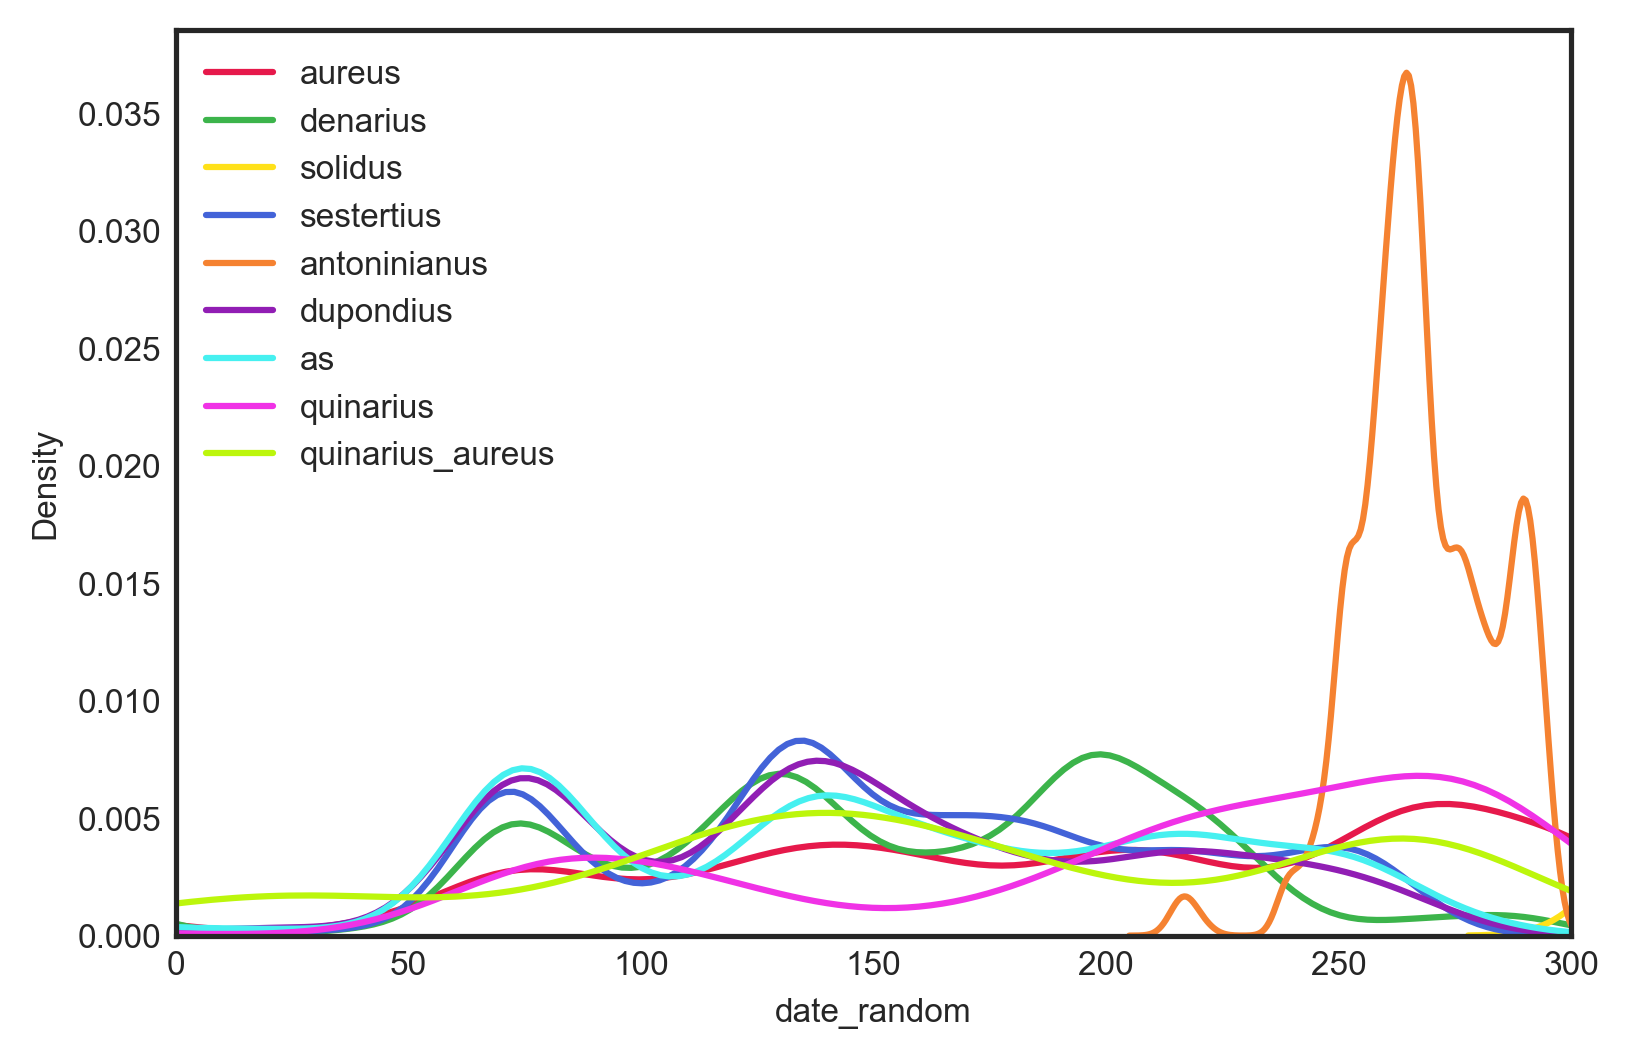

In [12]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax)
ax.set_xlim(0,300)
ax.legend()

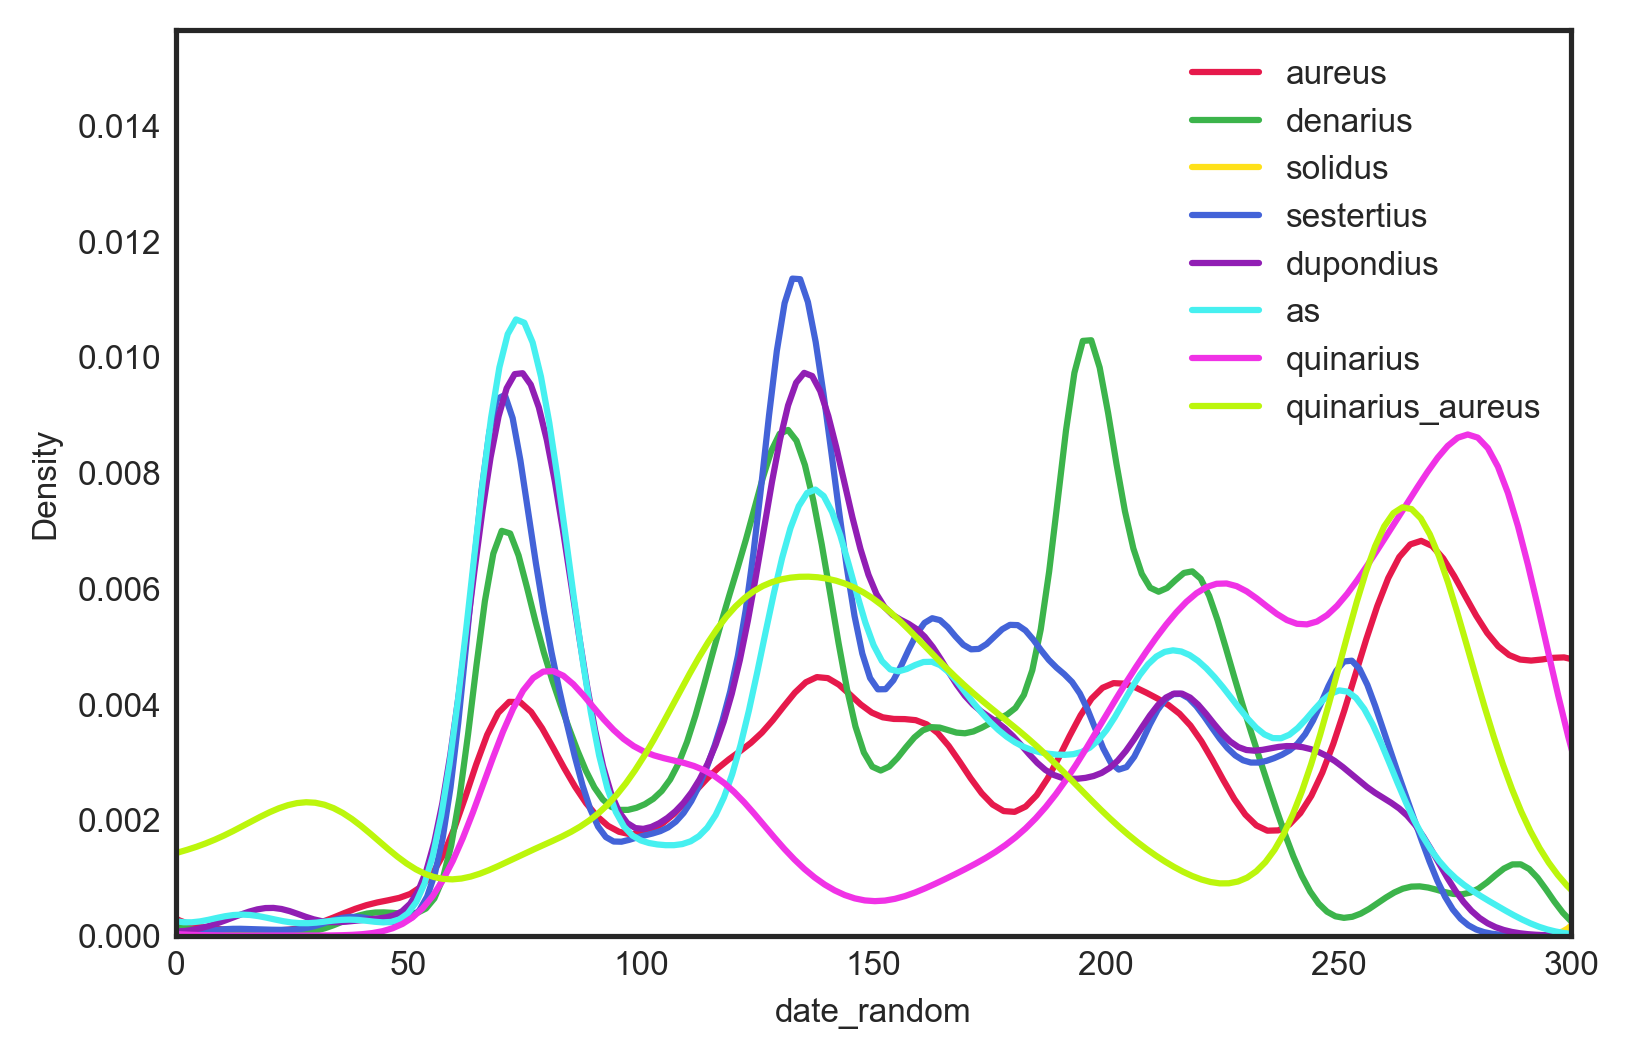

In [35]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    if type != "antoninianus":
        sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax, bw_adjust=0.5)
ax.set_xlim(0,300)
ax.legend()

In [14]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [15]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [16]:
deities_top20 = [tup[0] for tup in deities_top20_counts]

In [36]:
start, stop = 0, 300
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat_top20).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                 "n" : 0,
                 "counts" : [],
                 "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': 0, 'n': 20, 'counts': [('Victory', 10), ('rest', 10)], 'freqs_pct': [('Victory', 50.0), ('rest', 50.0)]}
{'date': 1, 'n': 8, 'counts': [('Victory', 8), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 2, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 3, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 4, 'n': 6, 'counts': [('Victory', 6), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 5, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 6, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 7, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 8, 'n': 8, 'counts': [('Victory', 8), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]

In [37]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)

In [38]:
date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]]

In [39]:
date_freqs_df.fillna(0, inplace=True) #,inplace=True)

In [40]:
date_freqs_df

Victory  Concordia  Securitas  Fortuna  Minerva  Spes  Roma  Mars  \
date                                                                      
0       50.00       0.00       0.00     0.00     0.00  0.00  0.00  0.00   
1      100.00       0.00       0.00     0.00     0.00  0.00  0.00  0.00   
2      100.00       0.00       0.00     0.00     0.00  0.00  0.00  0.00   
3      100.00       0.00       0.00     0.00     0.00  0.00  0.00  0.00   
4      100.00       0.00       0.00     0.00     0.00  0.00  0.00  0.00   
...       ...        ...        ...      ...      ...   ...   ...   ...   
295     14.79       1.93       1.69     2.81     1.46  1.23  1.11  5.79   
296     14.09       2.29       1.75     2.59     1.51  1.26  1.14  5.78   
297     13.93       2.40       1.79     2.40     1.48  1.23  1.42  6.10   
298     13.86       2.41       1.87     2.34     1.61  1.20  1.54  5.76   
299     14.68       2.43       1.77     2.06     1.62  1.18  1.55  5.68   

        Pax  Genius  ...  Salus  Felicitas  Aequitas  Pietas  Fides  Venus  \
date                 ...                                                     
0      0.00    0.00  ...   0.00       0.00      0.00    0.00   0.00   0.00   
1      0.00    0.00  ...   0.00       0.00      0.00    0.00   0.00   0.00   
2      0.00    0.00  ...   0.00       0.00      0.00    0.00   0.00   0.00   
3      0.00    0.00  ...   0.00       0.00      0.00    0.00   0.00   0.00   
4      0.00    0.00  ...   0.00       0.00      0.00    0.00   0.00   0.00   
...     ...     ...  ...    ...        ...       ...     ...    ...    ...   
295   15.31    0.58  ...   5.73       3.39      0.58    1.34   1.99   0.12   
296   15.53    0.54  ...   5.66       3.43      0.48    1.38   1.99   0.06   
297   14.61    0.55  ...   5.67       3.39      0.49    1.42   1.97   0.25   
298   14.39    0.60  ...   5.76       3.48      0.54    1.47   2.07   0.33   
299   14.09    0.66  ...   5.60       3.54      0.59    1.55   1.84   0.66   

      Hercules  Providentia   Sol   rest  
date                                      
0         0.00         0.00  0.00  50.00  
1         0.00         0.00  0.00   0.00  
2         0.00         0.00  0.00   0.00  
3         0.00         0.00  0.00   0.00  
4         0.00         0.00  0.00   0.00  
...        ...          ...   ...    ...  
295      13.50         8.36  3.97  13.91  
296      13.55         8.43  4.09  14.03  
297      13.93         8.26  4.25  14.00  
298      14.39         7.63  4.42  13.86  
299      14.16         7.67  4.35  13.86  

[300 rows x 21 columns]

In [41]:
date_freqs_dict = date_freqs_df.to_dict("list")# ["column_dtypes]

In [42]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

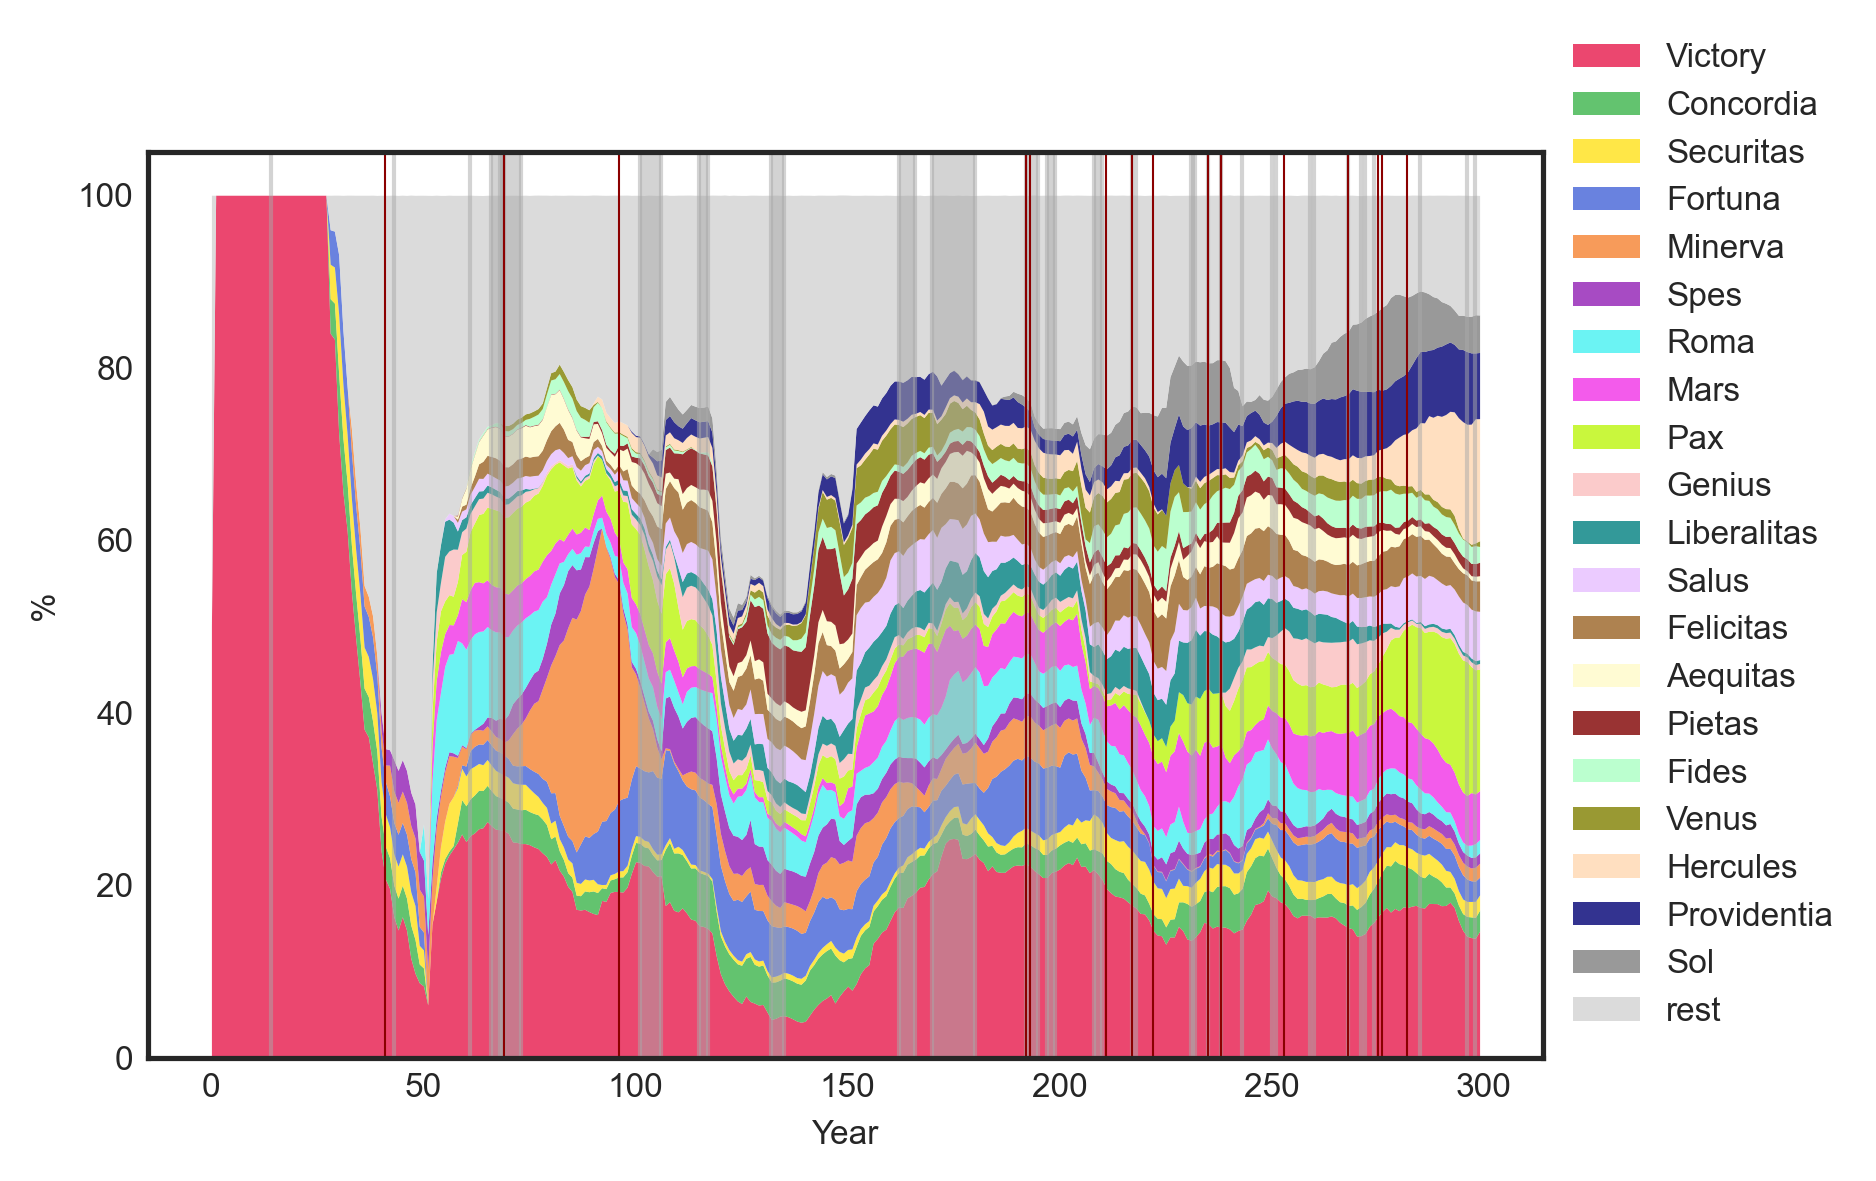

In [43]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df.index, date_freqs_dict.values(),
             labels=date_freqs_dict.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1,0))
ax.set_xlabel('Year')
ax.set_ylabel('%')

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="darkgrey", alpha=0.5)

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)

In [44]:
start, stop = 0, 300
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_bens = [d for d in deities_list_flat if d in ["Pax", "Securitas", "Felicitas", "Salus"]]
        deities_counts = nltk.FreqDist(deities_list_flat_bens).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_bens)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                     "n" : 0,
                     "counts" : [],
                     "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': 0, 'n': 20, 'counts': [('rest', 20)], 'freqs_pct': [('rest', 100.0)]}
{'date': 1, 'n': 8, 'counts': [('rest', 8)], 'freqs_pct': [('rest', 100.0)]}
{'date': 2, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 3, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 4, 'n': 6, 'counts': [('rest', 6)], 'freqs_pct': [('rest', 100.0)]}
{'date': 5, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 6, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 7, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 8, 'n': 8, 'counts': [('rest', 8)], 'freqs_pct': [('rest', 100.0)]}
{'date': 9, 'n': 8, 'counts': [('rest', 8)], 'freqs_pct': [('rest', 100.0)]}
{'date': 10, 'n': 9, 'counts': [('rest', 9)], 'freqs_pct': [('rest', 100.0)]}
{'date': 11, 'n': 9, 'counts': [('rest', 9)], 'freqs_pct': [('rest', 100.0)]}
{'date': 12, 'n': 10, 'counts': [('rest', 10)], 'freqs_pct': [('rest', 1

In [45]:
date_freqs_df_4bens = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df_4bens.set_index("date", inplace=True)
date_freqs_df_4bens = date_freqs_df_4bens[["Securitas", "Pax", "Salus", "Felicitas", "rest"]]
date_freqs_df_4bens

Securitas    Pax  Salus  Felicitas    rest
date                                            
0           NaN    NaN    NaN        NaN  100.00
1           NaN    NaN    NaN        NaN  100.00
2           NaN    NaN    NaN        NaN  100.00
3           NaN    NaN    NaN        NaN  100.00
4           NaN    NaN    NaN        NaN  100.00
...         ...    ...    ...        ...     ...
295        1.69  15.31   5.73       3.39   73.87
296        1.75  15.53   5.66       3.43   73.63
297        1.79  14.61   5.67       3.39   74.54
298        1.87  14.39   5.76       3.48   74.50
299        1.77  14.09   5.60       3.54   75.00

[300 rows x 5 columns]

In [46]:
date_freqs_df_4bens.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict_4bens = date_freqs_df_4bens.to_dict("list")  # ["column_dtypes]

In [47]:
date_freqs_df_4bens

Securitas    Pax  Salus  Felicitas    rest
date                                            
0          0.00   0.00   0.00       0.00  100.00
1          0.00   0.00   0.00       0.00  100.00
2          0.00   0.00   0.00       0.00  100.00
3          0.00   0.00   0.00       0.00  100.00
4          0.00   0.00   0.00       0.00  100.00
...         ...    ...    ...        ...     ...
295        1.69  15.31   5.73       3.39   73.87
296        1.75  15.53   5.66       3.43   73.63
297        1.79  14.61   5.67       3.39   74.54
298        1.87  14.39   5.76       3.48   74.50
299        1.77  14.09   5.60       3.54   75.00

[300 rows x 5 columns]

In [48]:
colors = colors[:4] + ["lightgray"]
colors

['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'lightgray']

(0.0, 27.0)

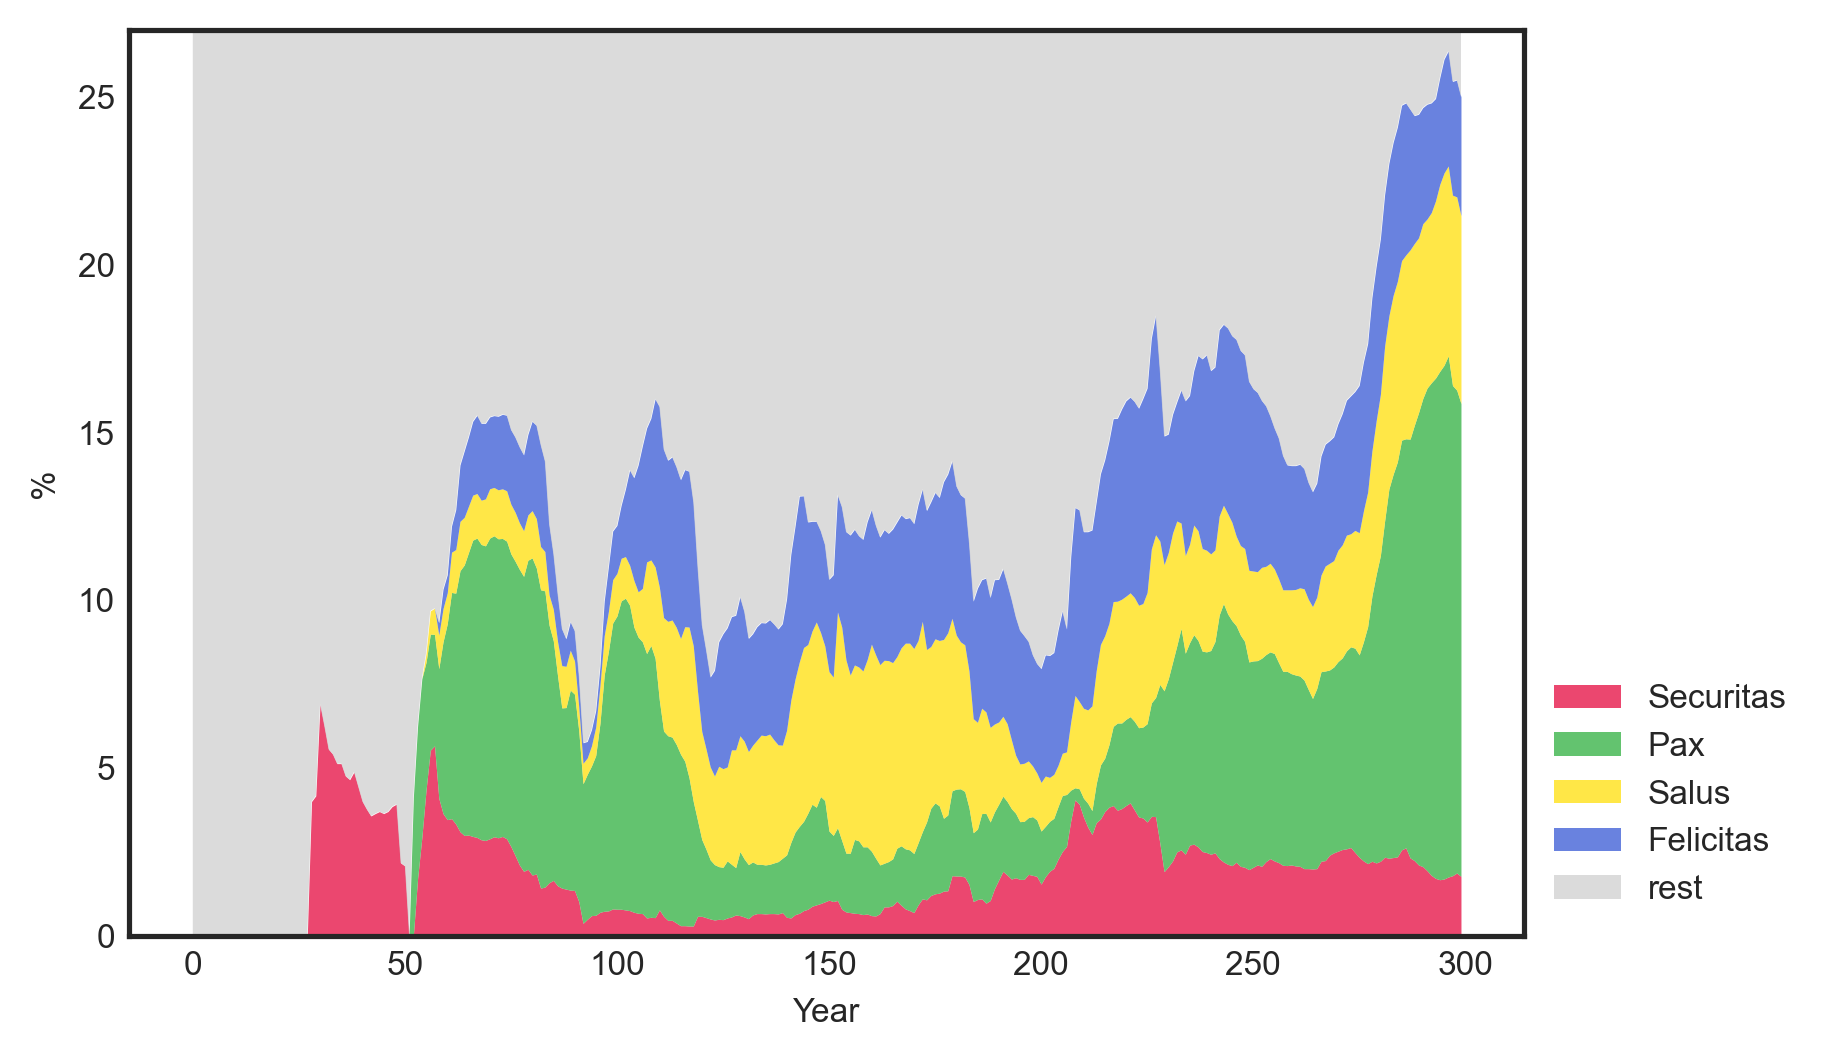

In [49]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df_4bens.index, date_freqs_dict_4bens.values(),
             labels=date_freqs_dict_4bens.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_xlabel('Year')
ax.set_ylabel('%')
ax.set_ylim(0,27)

# coins to dates

In [50]:
len({"dsd", "dsdsds"})

2

In [60]:
start, stop = -50, 350
data = []
for date in range(start, stop):
    date_subset = coins[coins["date_random"]==date]
    date_dict = {}
    date_dict["date"] = date
    #date_dict["coins_n"] = len(date_subset)
    deities_list_flat = [d for l in date_subset["deities"] for d in l]
    #date_dict["deities_n"] = len(deities_list_flat)
    deities_unique = list(set(deities_list_flat))
    #date_dict["deities_unique_N"] = len(deities_unique)
    deities_counts_dict = dict(nltk.FreqDist(deities_list_flat).most_common())
    date_dict.update(deities_counts_dict)
    data.append(date_dict)

In [61]:
date_freqs_df = pd.DataFrame(data)
date_freqs_df.fillna(0, inplace=True)  #,inplace=True)
date_freqs_df.set_index("date", inplace=True)
date_freqs_df[150:170]

Victory   Pax  Venus  Mars  Aurora  Apollo  Pegasus  Diana  Pan  \
date                                                                    
100       7.0   2.0    0.0   1.0     0.0     0.0      0.0    0.0  0.0   
101      12.0   4.0    0.0   3.0     0.0     0.0      1.0    0.0  0.0   
102       8.0   1.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
103       4.0   2.0    1.0   1.0     0.0     0.0      0.0    0.0  0.0   
104      12.0   2.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
105       7.0   2.0    0.0   1.0     0.0     0.0      0.0    0.0  0.0   
106      11.0   6.0    0.0   1.0     0.0     0.0      0.0    1.0  0.0   
107       7.0   8.0    0.0   3.0     0.0     0.0      0.0    0.0  0.0   
108      10.0   4.0    0.0   4.0     0.0     0.0      0.0    0.0  0.0   
109       8.0   2.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
110      12.0   2.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0   
111       5.0   3.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
112       4.0   2.0    0.0   1.0     0.0     0.0      0.0    1.0  0.0   
113       7.0   1.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
114       7.0   0.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
115       3.0   0.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
116       6.0   0.0    0.0   1.0     0.0     0.0      0.0    0.0  0.0   
117      13.0  15.0    0.0   2.0     0.0     0.0      0.0    0.0  0.0   
118       0.0   0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0   
119       3.0   6.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0   

      Sicilia  ...  Caritas  Colapis  Tempus  Parcae  Equitas  Quies  \
date           ...                                                     
100       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
101       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
102       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
103       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
104       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
105       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
106       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
107       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
108       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
109       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
110       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
111       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
112       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
113       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
114       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
115       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
116       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
117       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
118       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   
119       0.0  ...      0.0      0.0     0.0     0.0      0.0    0.0   

      Alamannia  Francia  Sarmatia  Constantinopolis  
date                                                  
100         0.0      0.0       0.0               0.0  
101         0.0      0.0       0.0               0.0  
102         0.0      0.0       0.0               0.0  
103         0.0      0.0       0.0               0.0  
104         0.0      0.0       0.0               0.0  
105         0.0      0.0       0.0               0.0  
106         0.0      0.0       0.0               0.0  
107         0.0      0.0       0.0               0.0  
108         0.0      0.0       0.0               0.0  
109         0.0      0.0       0.0               0.0  
110         0.0      0.0       0.0               0.0  
111         0.0      0.0       0.0               0.0  
112         0.0      0.0       0.0          

In [71]:
pctchange_df = date_freqs_df.pct_change()
pctchange_df.replace(np.inf, 1, inplace=True)
pctchange_df.fillna(0, inplace=True)
pctchange_df = pctchange_df * 100 #to percentage
pctchange_df[150:170]

Victory         Pax  Venus        Mars  Aurora  Apollo  Pegasus  \
date                                                                       
100   -36.363636  -77.777778    0.0  100.000000     0.0     0.0      0.0   
101    71.428571  100.000000    0.0  200.000000     0.0     0.0    100.0   
102   -33.333333  -75.000000    0.0  -33.333333     0.0     0.0   -100.0   
103   -50.000000  100.000000  100.0  -50.000000     0.0     0.0      0.0   
104   200.000000    0.000000 -100.0  100.000000     0.0     0.0      0.0   
105   -41.666667    0.000000    0.0  -50.000000     0.0     0.0      0.0   
106    57.142857  200.000000    0.0    0.000000     0.0     0.0      0.0   
107   -36.363636   33.333333    0.0  200.000000     0.0     0.0      0.0   
108    42.857143  -50.000000    0.0   33.333333     0.0     0.0      0.0   
109   -20.000000  -50.000000    0.0  -50.000000     0.0     0.0      0.0   
110    50.000000    0.000000    0.0 -100.000000     0.0     0.0      0.0   
111   -58.333333   50.000000    0.0  100.000000     0.0     0.0      0.0   
112   -20.000000  -33.333333    0.0  -50.000000     0.0     0.0      0.0   
113    75.000000  -50.000000    0.0  100.000000     0.0     0.0      0.0   
114     0.000000 -100.000000    0.0    0.000000     0.0     0.0      0.0   
115   -57.142857    0.000000    0.0    0.000000     0.0     0.0      0.0   
116   100.000000    0.000000    0.0  -50.000000     0.0     0.0      0.0   
117   116.666667  100.000000    0.0  100.000000     0.0     0.0      0.0   
118  -100.000000 -100.000000    0.0 -100.000000     0.0     0.0      0.0   
119   100.000000  100.000000    0.0    0.000000     0.0     0.0      0.0   

      Diana  Pan  Sicilia  ...  Caritas  Colapis  Tempus  Parcae  Equitas  \
date                       ...                                              
100     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
101     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
102     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
103     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
104     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
105     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
106   100.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
107  -100.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
108     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
109     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
110     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
111     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
112   100.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
113  -100.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
114     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
115     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
116     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
117     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
118     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   
119     0.0  0.0      0.0  ...      0.0      0.0     0.0     0.0      0.0   

      Quies  Alamannia  Francia  Sarmatia  Constantinopolis  
date                                                         
100     0.0        0.0      0.0       0.0               0.0  
101     0.0        0.0      0.0       0.0               0.0  
102     0.0        0.0      0.0       0.0               0.0  
103     0.0        0.0      0.0       0.0               0.0  
104     0.0        0.0      0.0       0.0               0.0  
105     0.0        0.0      0.0       0.0               0.0  
106     0.0        0.0      0.0       0.0               0.0  
107     0.0        0.0      0.0       0.0               0.0  
108     0.0        0.

In [82]:
pctchange_df = pctchange_df.abs()
pctchange_df[150:170]

Victory         Pax  Venus        Mars  Aurora  Apollo  Pegasus  \
date                                                                       
100    36.363636   77.777778    0.0  100.000000     0.0     0.0      0.0   
101    71.428571  100.000000    0.0  200.000000     0.0     0.0    100.0   
102    33.333333   75.000000    0.0   33.333333     0.0     0.0    100.0   
103    50.000000  100.000000  100.0   50.000000     0.0     0.0      0.0   
104   200.000000    0.000000  100.0  100.000000     0.0     0.0      0.0   
105    41.666667    0.000000    0.0   50.000000     0.0     0.0      0.0   
106    57.142857  200.000000    0.0    0.000000     0.0     0.0      0.0   
107    36.363636   33.333333    0.0  200.000000     0.0     0.0      0.0   
108    42.857143   50.000000    0.0   33.333333     0.0     0.0      0.0   
109    20.000000   50.000000    0.0   50.000000     0.0     0.0      0.0   
110    50.000000    0.000000    0.0  100.000000     0.0     0.0      0.0   
111    58.333333   50.000000    0.0  100.000000     0.0     0.0      0.0   
112    20.000000   33.333333    0.0   50.000000     0.0     0.0      0.0   
113    75.000000   50.000000    0.0  100.000000     0.0     0.0      0.0   
114     0.000000  100.000000    0.0    0.000000     0.0     0.0      0.0   
115    57.142857    0.000000    0.0    0.000000     0.0     0.0      0.0   
116   100.000000    0.000000    0.0   50.000000     0.0     0.0      0.0   
117   116.666667  100.000000    0.0  100.000000     0.0     0.0      0.0   
118   100.000000  100.000000    0.0  100.000000     0.0     0.0      0.0   
119   100.000000  100.000000    0.0    0.000000     0.0     0.0      0.0   

      Diana  Pan  Sicilia  ...  Colapis  Tempus  Parcae  Equitas  Quies  \
date                       ...                                            
100     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
101     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
102     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
103     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
104     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
105     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
106   100.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
107   100.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
108     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
109     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
110     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
111     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
112   100.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
113   100.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
114     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
115     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
116     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
117     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
118     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   
119     0.0  0.0      0.0  ...      0.0     0.0     0.0      0.0    0.0   

      Alamannia  Francia  Sarmatia  Constantinopolis  mean_change  
date                                                               
100         0.0      0.0       0.0               0.0     0.734337  
101         0.0      0.0       0.0               0.0     2.892200  
102         0.0      0.0       0.0               0.0     2.096115  
103         0.0      0.0       0.0               0.0     7.361963  
104         0.0      0.0       0.0               0.0     0.562372  
105         0.0      0.0       0.0               0.0     2.402863  
106         0.0      0.0       0.0               0.0     1.066316  
107         0.0      0.0       0.0               0.0     2.946644  
108  

In [83]:
pctchange_df["mean_change"] = pctchange_df.mean(axis=1)
pctchange_df["mean_change"][150:170]

date
100     6.831898
101     7.770249
102     5.754651
103    13.459524
104    11.639608
105    11.650830
106    13.058186
107    12.129941
108    10.123056
109    10.743304
110     9.059055
111     9.197466
112     9.783780
113     7.188014
114    15.890817
115    12.714977
116     7.388826
117    45.669360
118    12.856443
119    15.329942
Name: mean_change, dtype: float64

Text(0, 0.5, 'avg. pct. change')

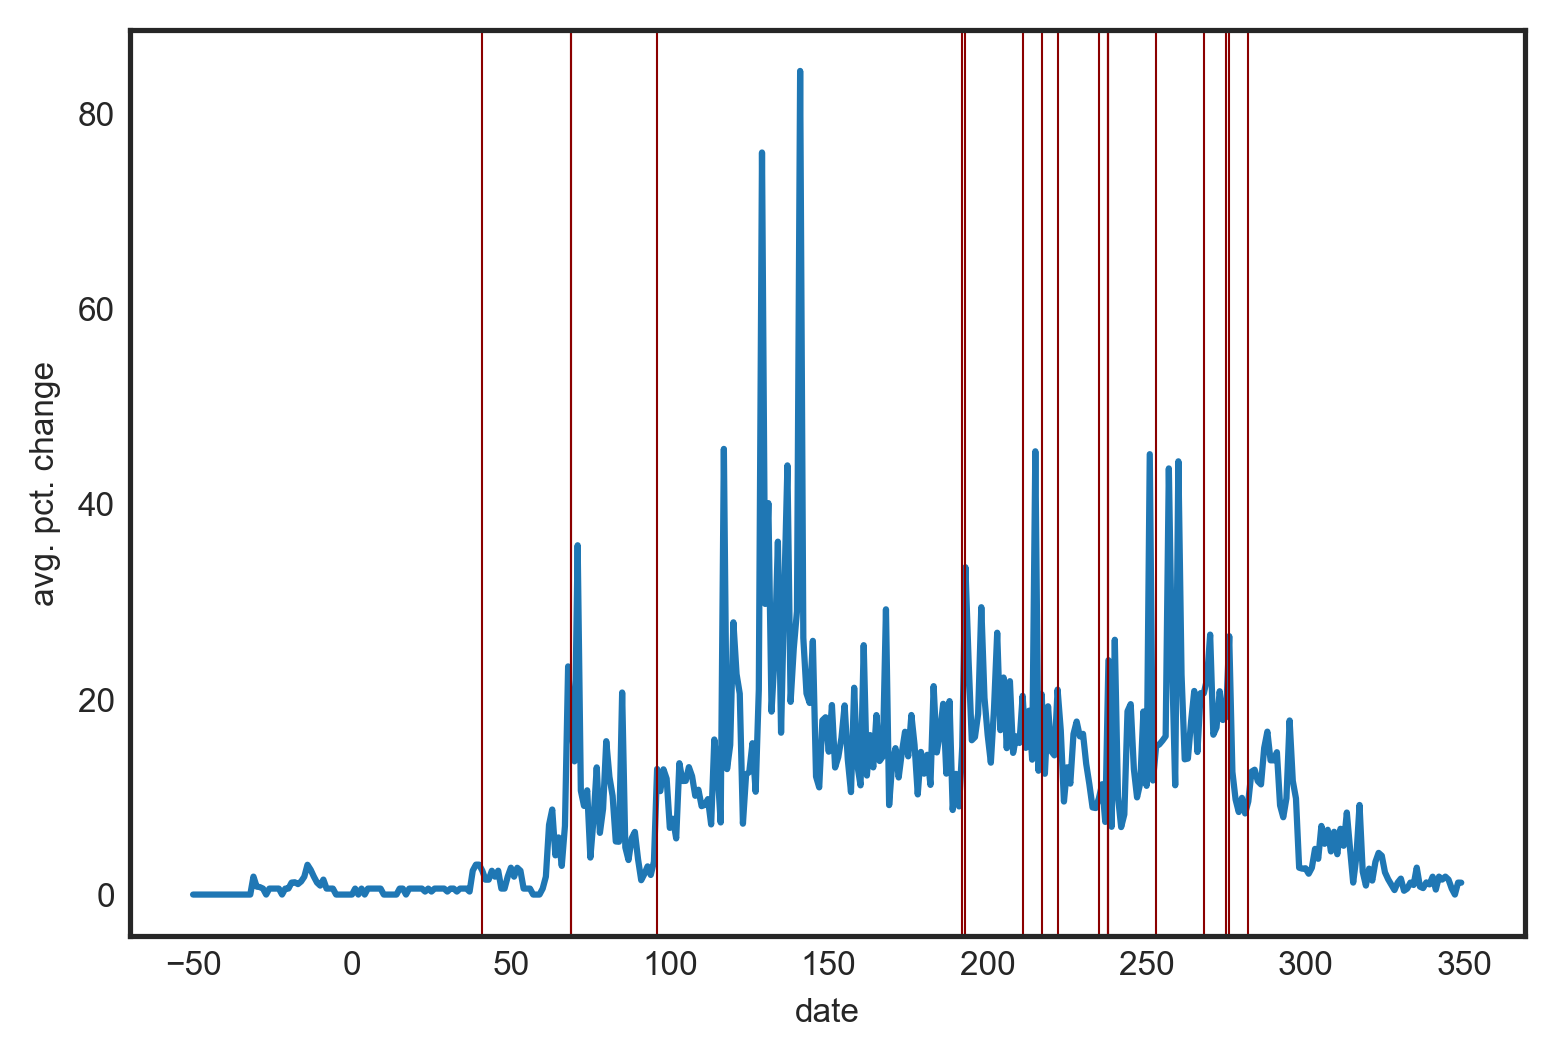

In [88]:
fig, ax = plt.subplots()

pctchange_df["mean_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("avg. pct. change")

# PNAS - lead pollution

In [89]:
pnas = pd.read_excel("../data/pnas.xlsx", sheet_name="Fig. 2", header=None)
pnas.head(10)

0     1  \
0  Please reference the following when using thes...   NaN   
1  McConnell, J.R., A.I. Wilson, A. Stohl, M.M. A...   NaN   
2   Lead pollution recorded in Greenland ice indi...   NaN   
3   Proc Natl Acad Sci U.S.A., doi: 10.1073/pnas....   NaN   
4                                                NaN   NaN   
5                                        Year Before  Lead   
6                                               1950  pg/g   
7                                             3185.5  2.86   
8                                             3184.5  3.86   
9                                             3183.5  2.24   

                       2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6  Missing values -0.999  
7                    NaN  
8                    NaN  
9                    NaN

In [71]:
pnas = pnas[7:].copy()
pnas["date"] = pnas[0].apply(lambda x: 1950.5 - x)
def clean_pol(pol):
    if pol == -0.999:
        pol = np.nan
    return pol
pnas["pollution"] = pnas[1].apply(clean_pol)
pnas.head(5)

0     1    2    date  pollution
7   3185.5  2.86  NaN -1235.0       2.86
8   3184.5  3.86  NaN -1234.0       3.86
9   3183.5  2.24  NaN -1233.0       2.24
10  3182.5  1.79  NaN -1232.0       1.79
11  3181.5  1.44  NaN -1231.0       1.44

In [72]:
pnas['pollution'].interpolate().rolling(11, center=True).mean()

7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
        ..
2039   NaN
2040   NaN
2041   NaN
2042   NaN
2043   NaN
Name: pollution, Length: 2037, dtype: float64

(0.0, 300.0)

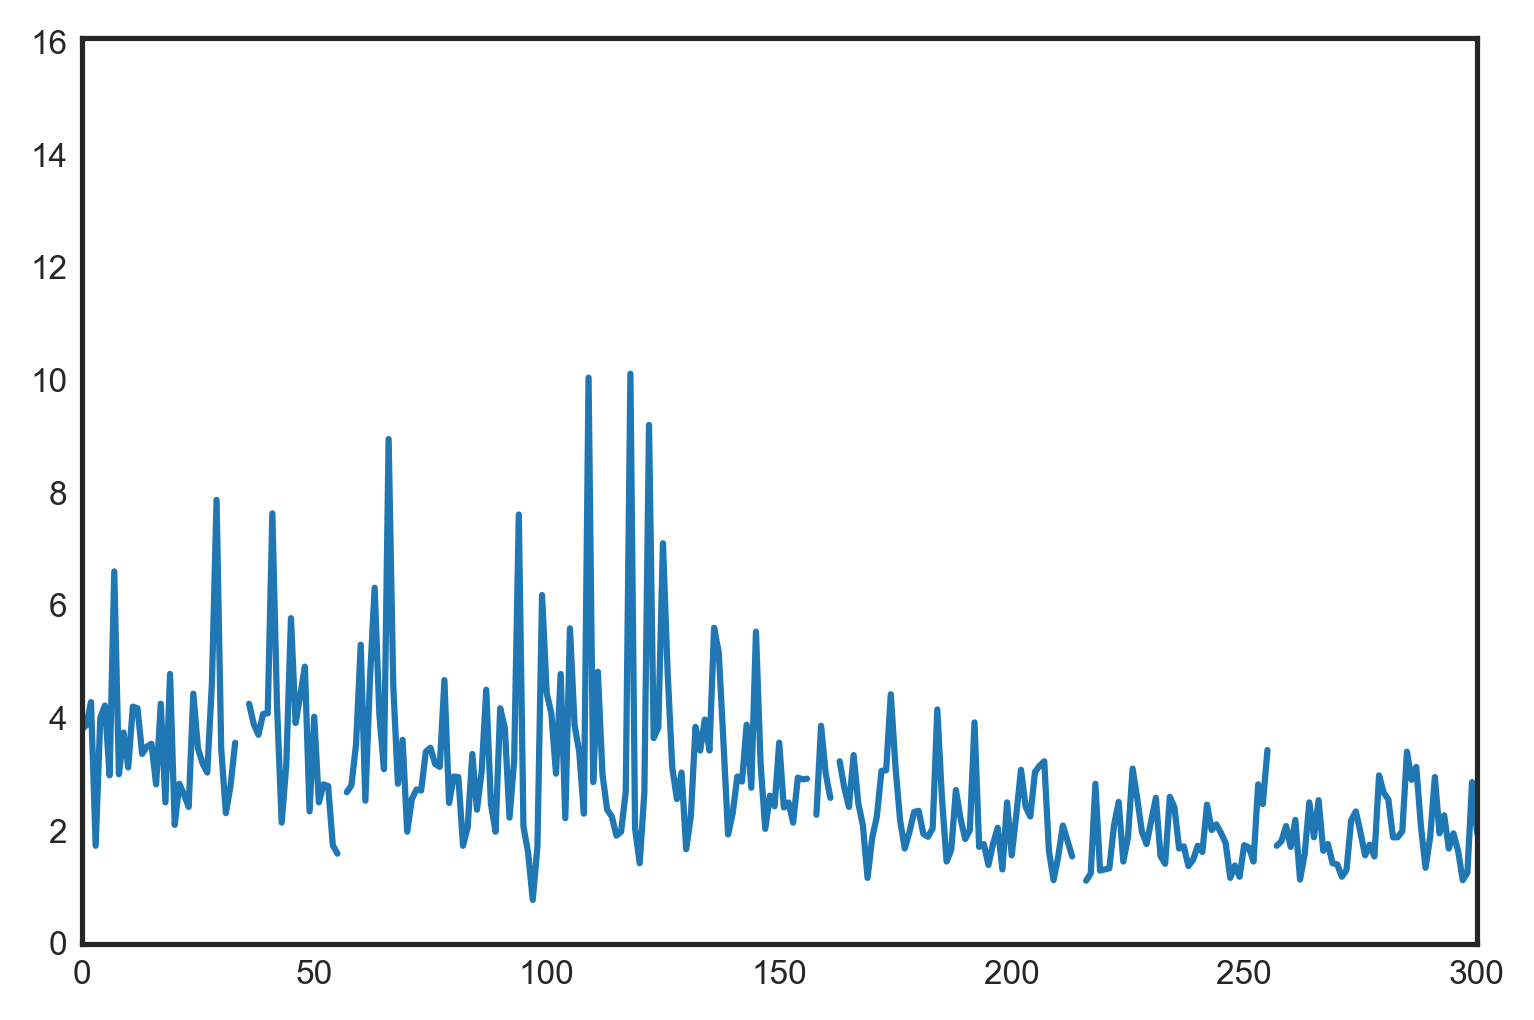

In [73]:
fig,ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution"])
ax.set_xlim(0,300)

(0.0, 300.0)

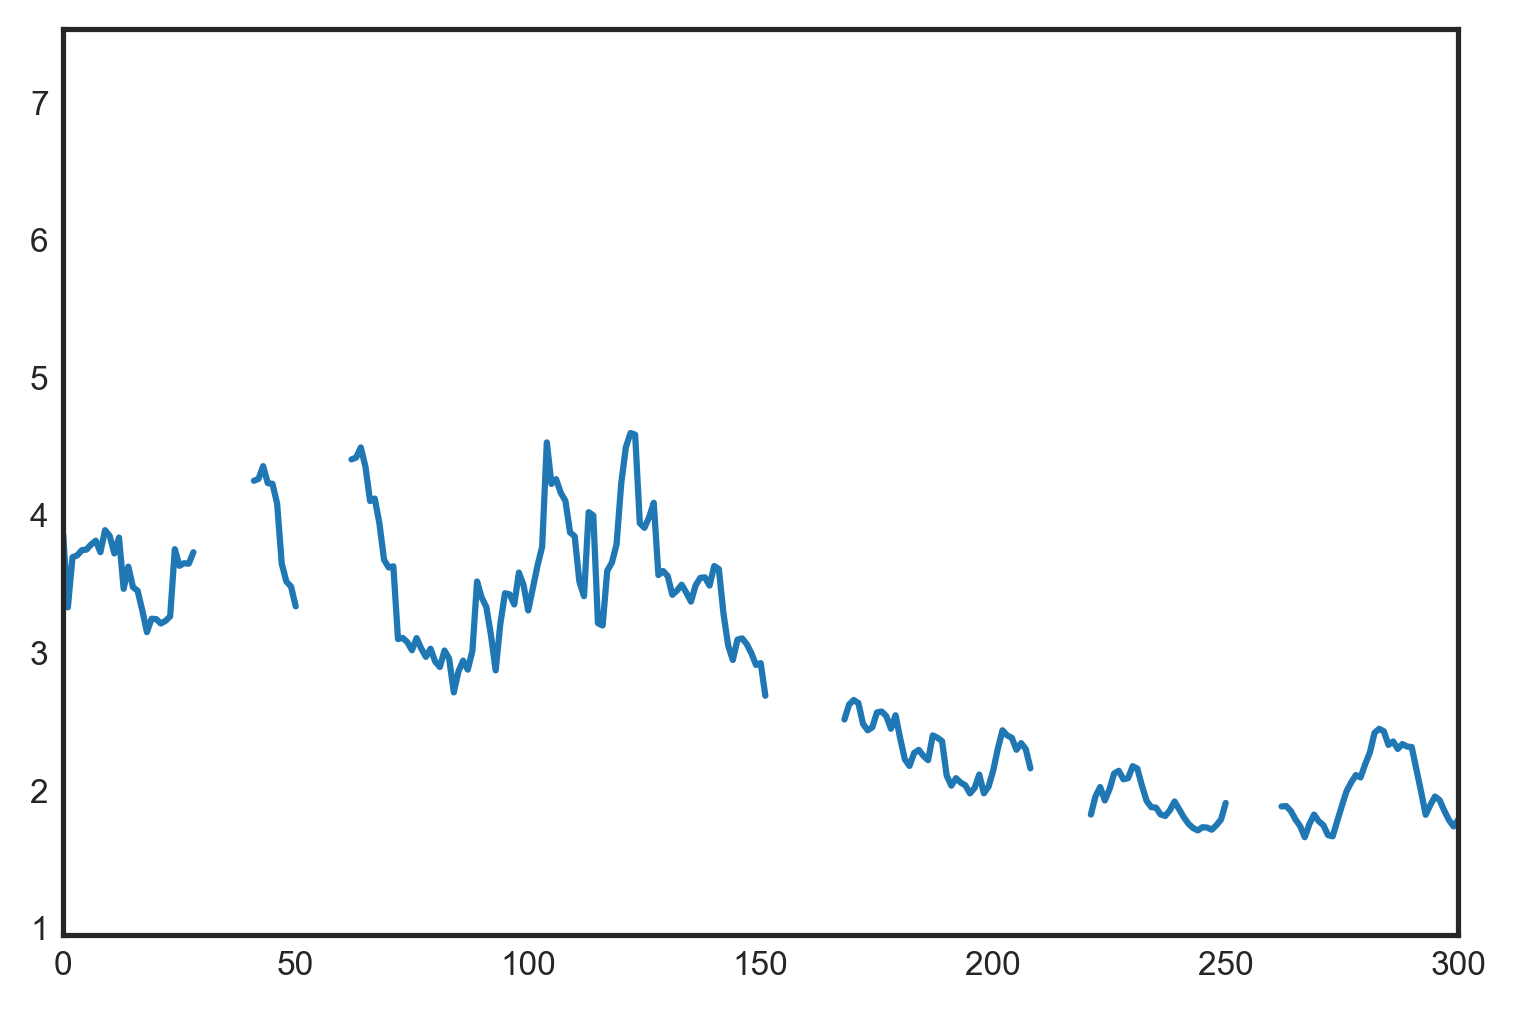

In [74]:
fig,ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(0,300)

In [75]:
pnas['pollution_interpol'] = pnas['pollution'].interpolate()

(0.0, 300.0)

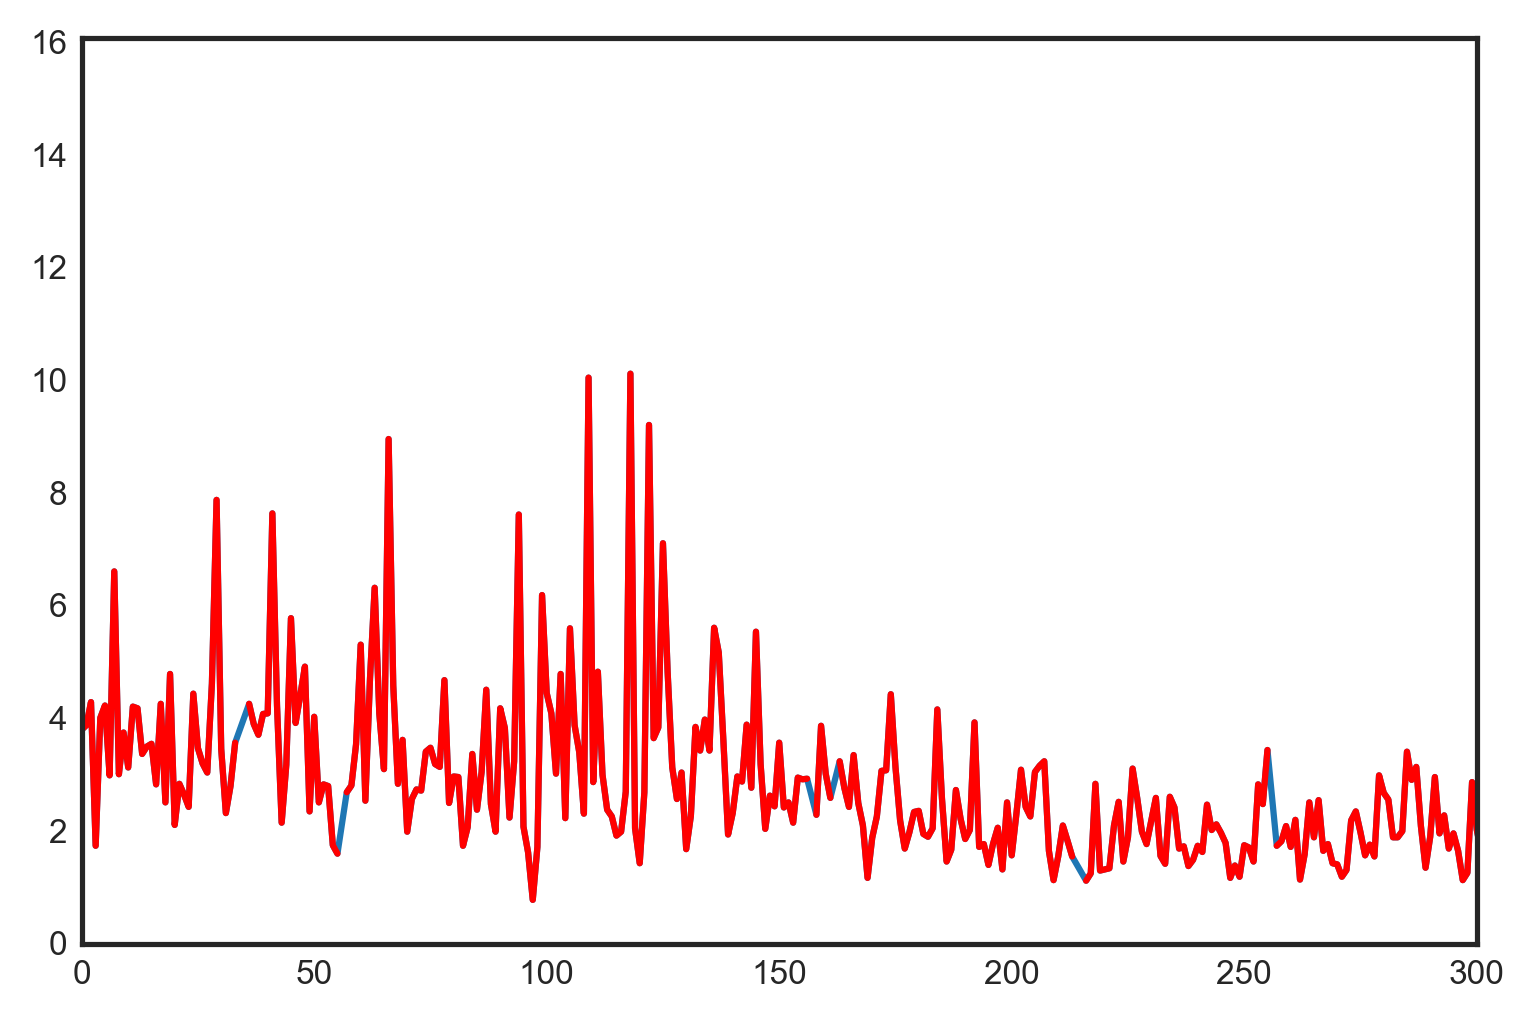

In [76]:
fig, ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution_interpol"])
ax.plot(pnas["date"], pnas["pollution"], color="red")
ax.set_xlim(0, 300)

(0.0, 300.0)

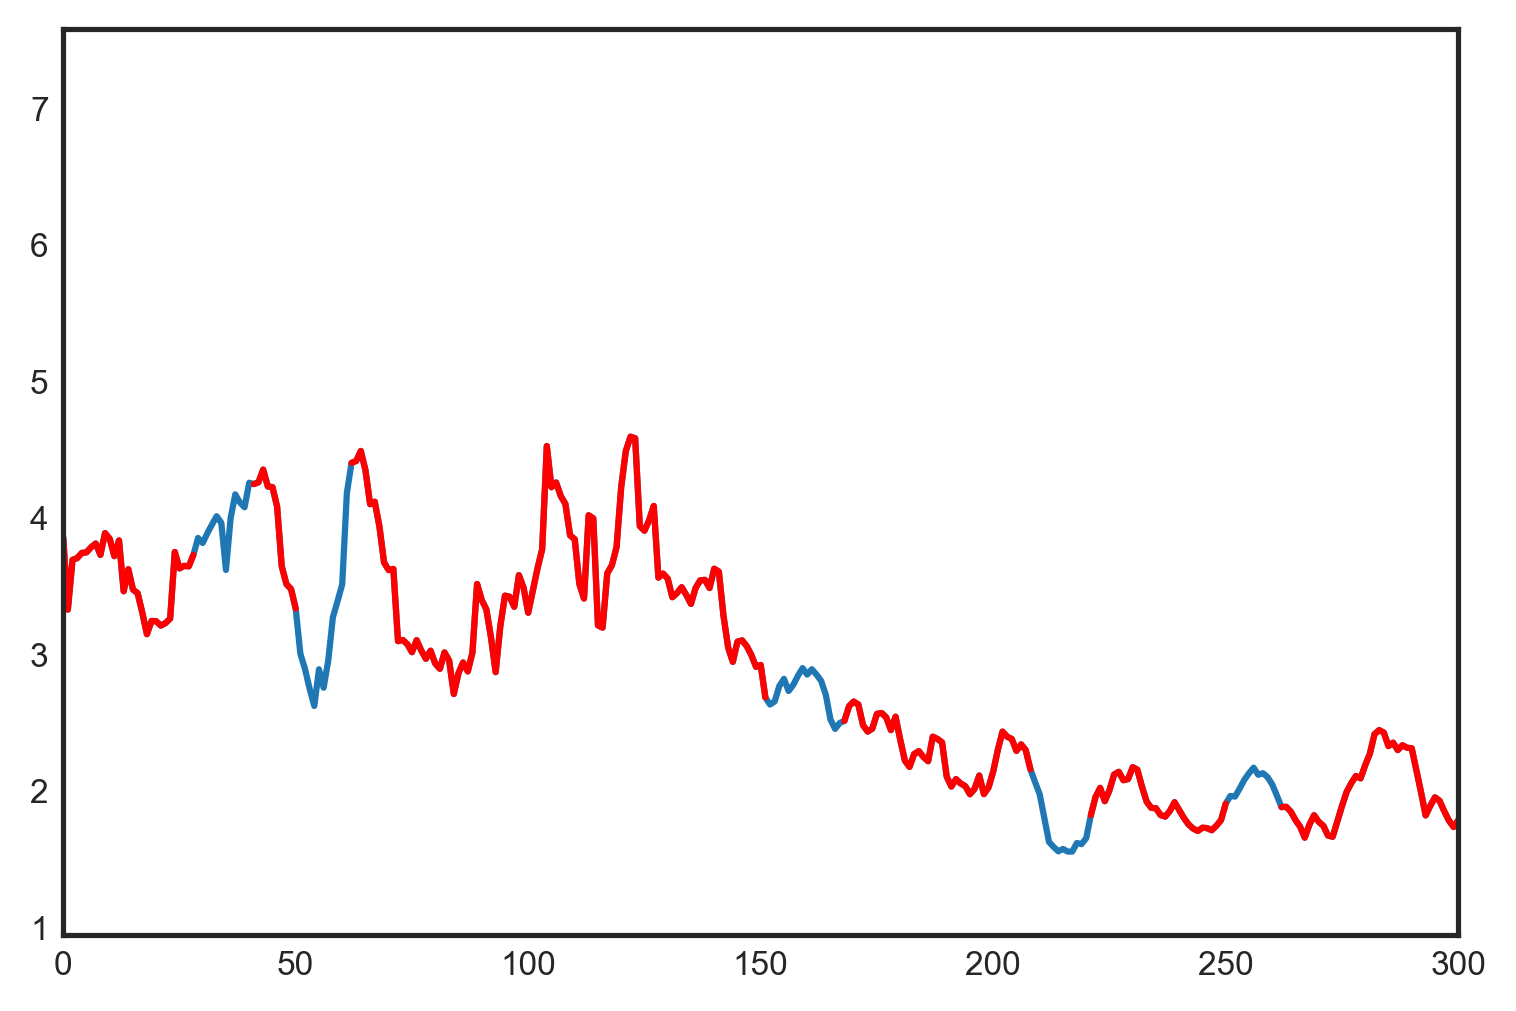

In [77]:
fig, ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean())
ax.plot(pnas["date"], pnas["pollution"].rolling(11, center=True).mean(), color="red")
ax.set_xlim(0, 300)

In [78]:
date_freqs_df

Victory  Concordia  Securitas  Fortuna  Minerva  Spes  Roma  Genius  \
date                                                                        
0       35.71       0.00       0.00     0.00     0.00  0.00  0.00    0.00   
1      100.00       0.00       0.00     0.00     0.00  0.00  0.00    0.00   
2      100.00       0.00       0.00     0.00     0.00  0.00  0.00    0.00   
3      100.00       0.00       0.00     0.00     0.00  0.00  0.00    0.00   
4      100.00       0.00       0.00     0.00     0.00  0.00  0.00    0.00   
...       ...        ...        ...      ...      ...   ...   ...     ...   
295     14.89       1.79       1.73     2.75     1.50  1.20  1.14    0.54   
296     14.11       2.37       1.72     2.55     1.48  1.24  1.24    0.53   
297     14.16       2.44       1.73     2.56     1.49  1.25  1.37    0.54   
298     13.91       2.44       1.72     2.56     1.49  1.25  1.37    0.54   
299     13.90       2.47       1.74     2.59     1.50  1.26  1.38    0.54   

      Mars    Pax  ...  Salus  Felicitas  Aequitas  Fides  Pietas  Venus  \
date               ...                                                     
0     0.00   0.00  ...   0.00       0.00      0.00   0.00    0.00   0.00   
1     0.00   0.00  ...   0.00       0.00      0.00   0.00    0.00   0.00   
2     0.00   0.00  ...   0.00       0.00      0.00   0.00    0.00   0.00   
3     0.00   0.00  ...   0.00       0.00      0.00   0.00    0.00   0.00   
4     0.00   0.00  ...   0.00       0.00      0.00   0.00    0.00   0.00   
...    ...    ...  ...    ...        ...       ...    ...     ...    ...   
295   5.92  15.49  ...   5.80       3.17      0.48   2.03    1.38   0.06   
296   5.87  15.29  ...   5.69       3.38      0.47   1.96    1.36   0.06   
297   5.95  15.35  ...   5.71       3.39      0.48   1.96    1.37   0.06   
298   6.00  15.34  ...   5.77       3.39      0.48   1.96    1.37   0.36   
299   6.08  15.52  ...   5.84       3.43      0.48   1.99    1.38   0.48   

      Hercules  Providentia   Sol   rest  
date                                      
0         0.00         0.00  0.00  64.29  
1         0.00         0.00  0.00   0.00  
2         0.00         0.00  0.00   0.00  
3         0.00         0.00  0.00   0.00  
4         0.00         0.00  0.00   0.00  
...        ...          ...   ...    ...  
295      13.28         8.43  3.95  14.06  
296      13.93         8.30  4.15  13.87  
297      13.38         8.33  4.16  13.92  
298      13.02         8.32  4.40  13.91  
299      12.03         8.42  4.45  14.08  

[300 rows x 21 columns]

In [79]:
deities_top20

['Victory',
 'Pax',
 'Mars',
 'Roma',
 'Fortuna',
 'Felicitas',
 'Providentia',
 'Concordia',
 'Salus',
 'Minerva',
 'Sol',
 'Liberalitas',
 'Aequitas',
 'Spes',
 'Hercules',
 'Pietas',
 'Fides',
 'Genius',
 'Securitas',
 'Venus']

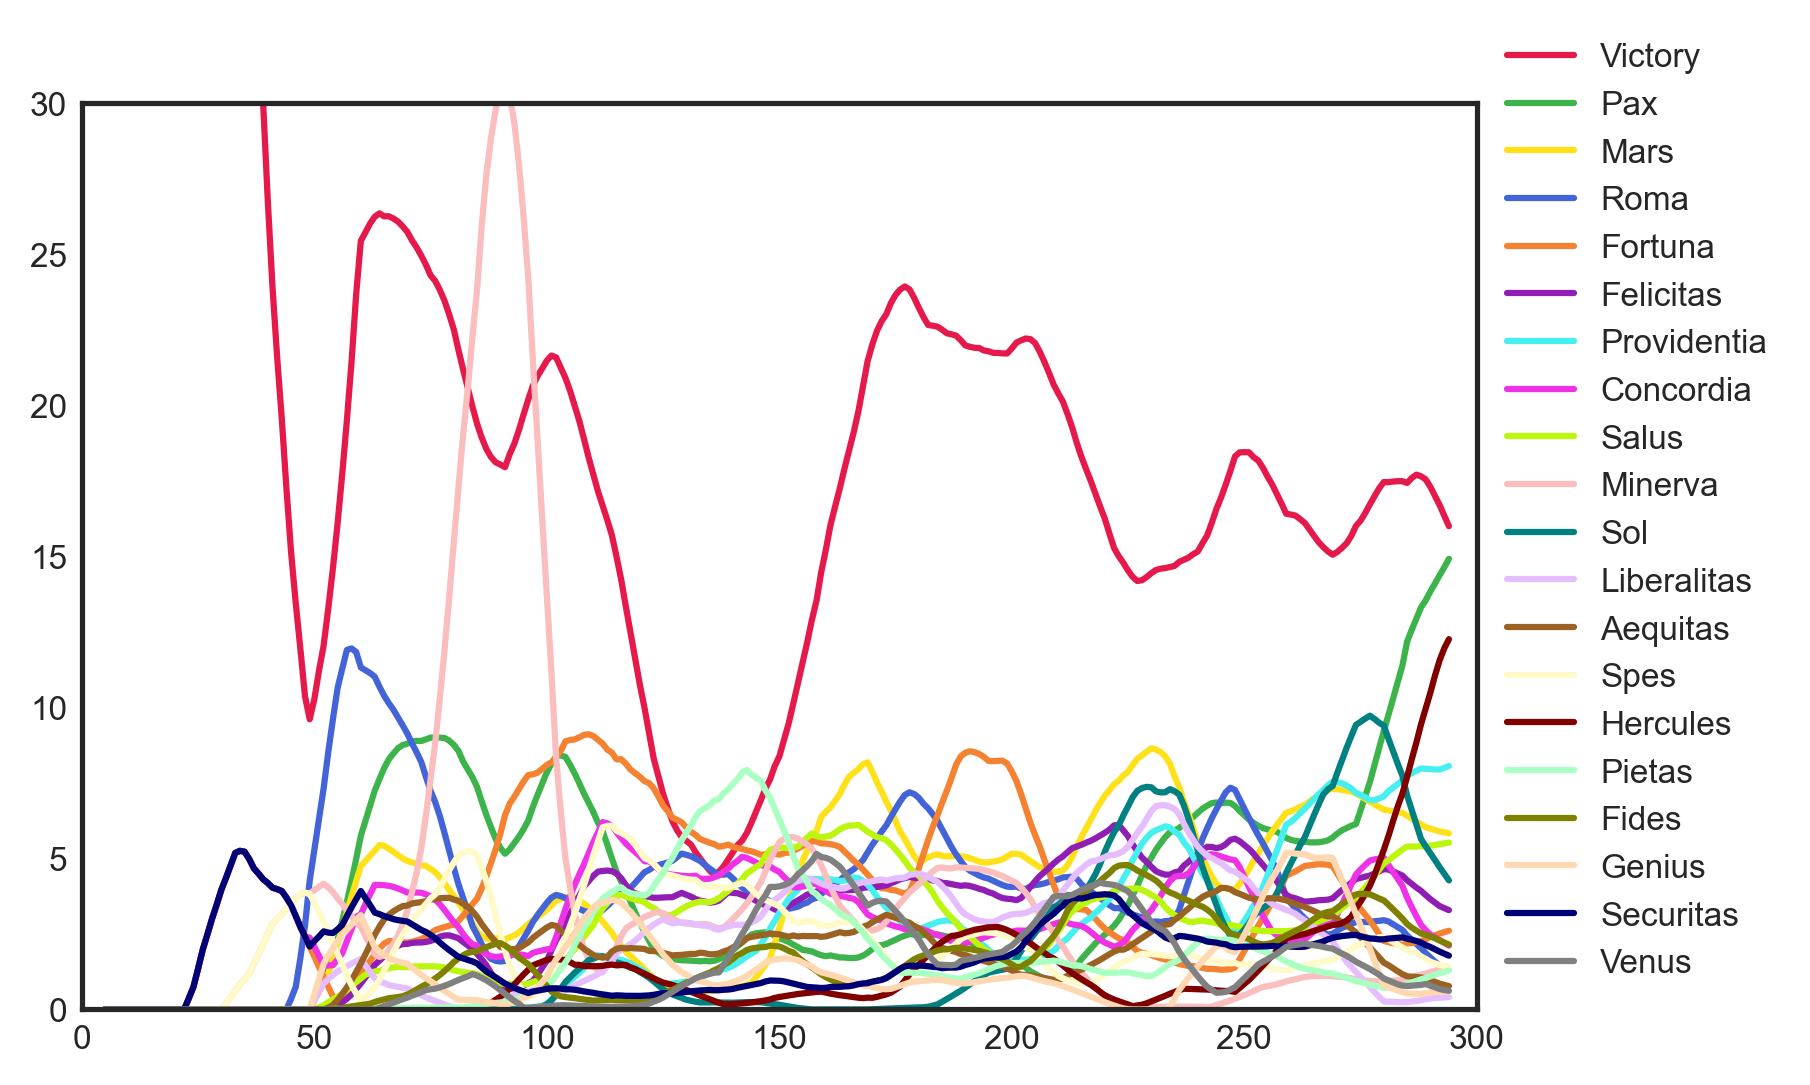

In [80]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,30)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

In [81]:
def check_deity(deities_list, deity):
    if deity in deities_list:
        return True
    else:
        return False

<AxesSubplot:xlabel='date_avr', ylabel='Density'>

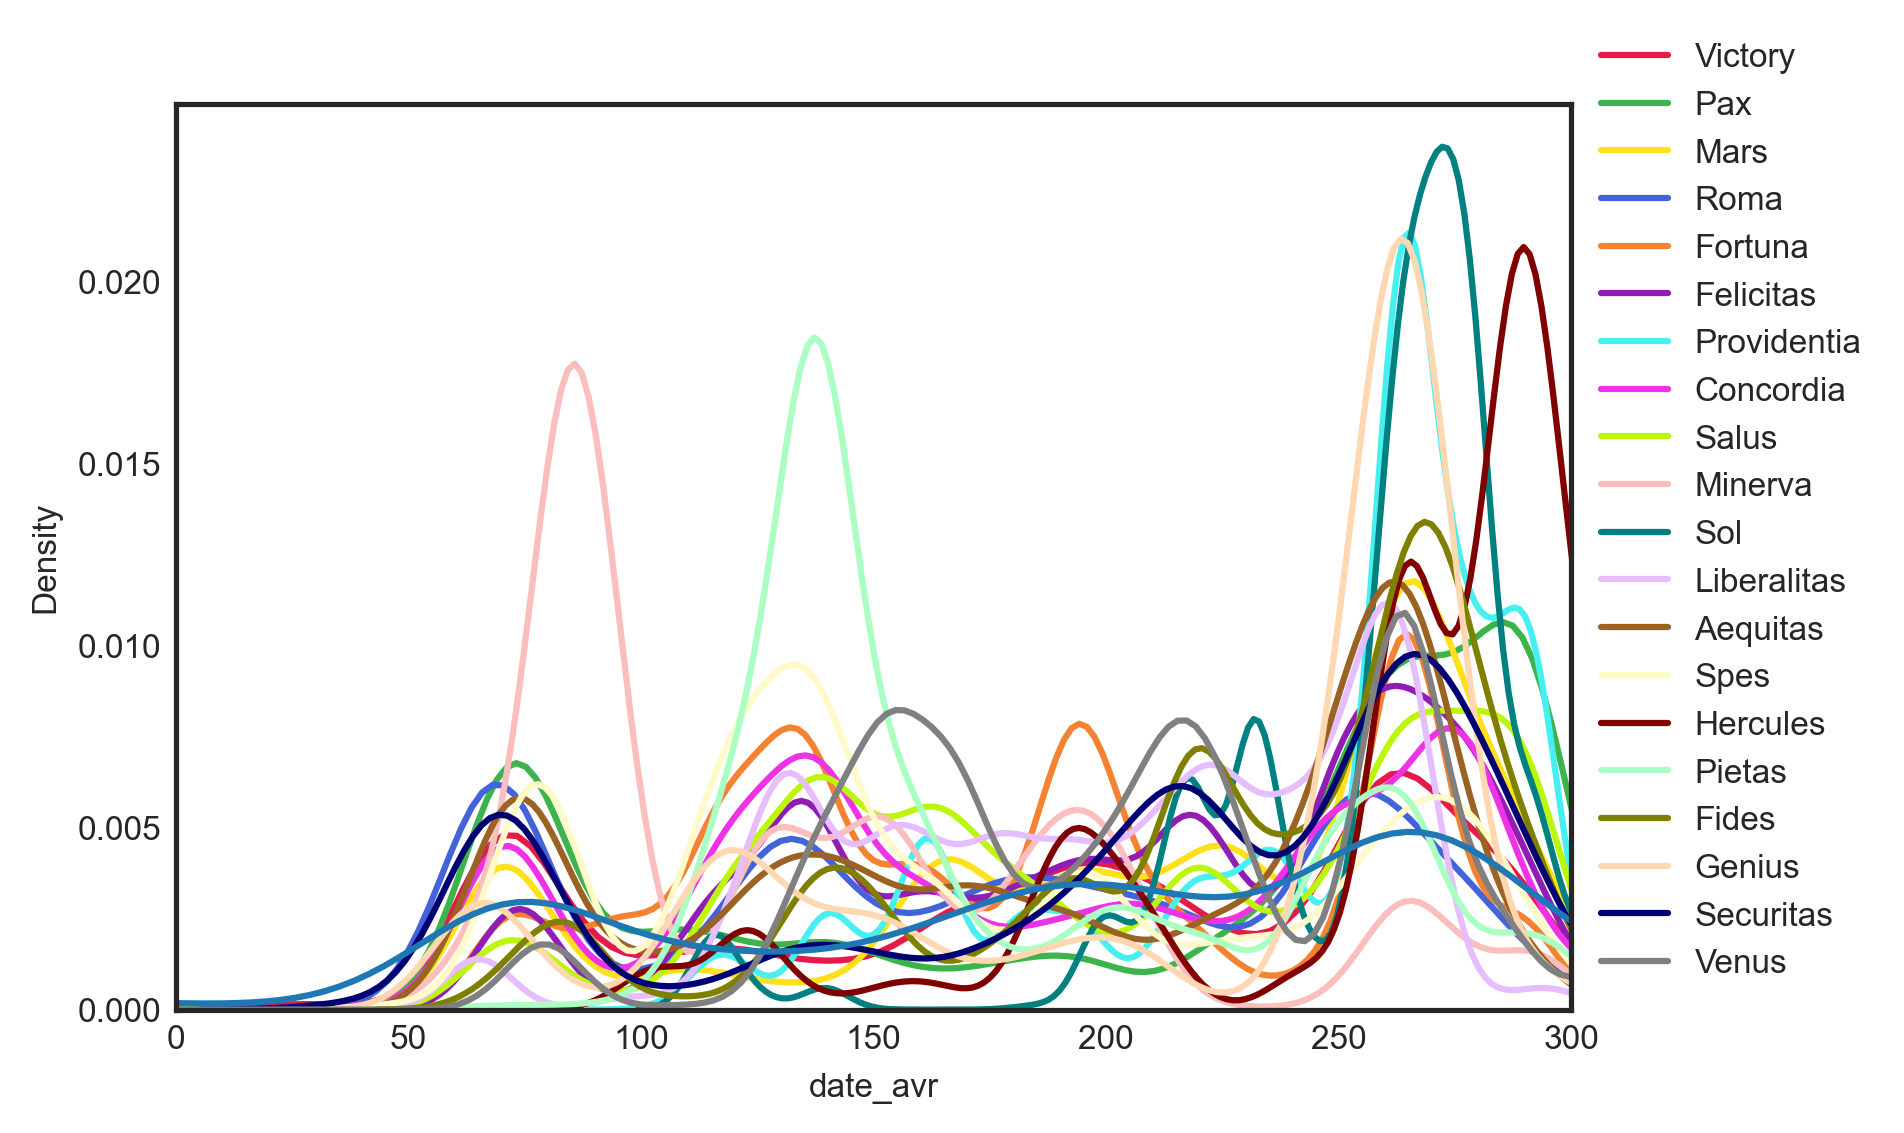

In [82]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_avr"], color=color, label=deity, bw_adjust=0.5)
ax.set_xlim(0, 300)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, "Victory"))]["date_avr"])




In [83]:
deities_select = ["Mars", "Pax", "Securitas", "Aequitas", "Felicitas", "Salus", "Fortuna", "Spes", "Pietas"]

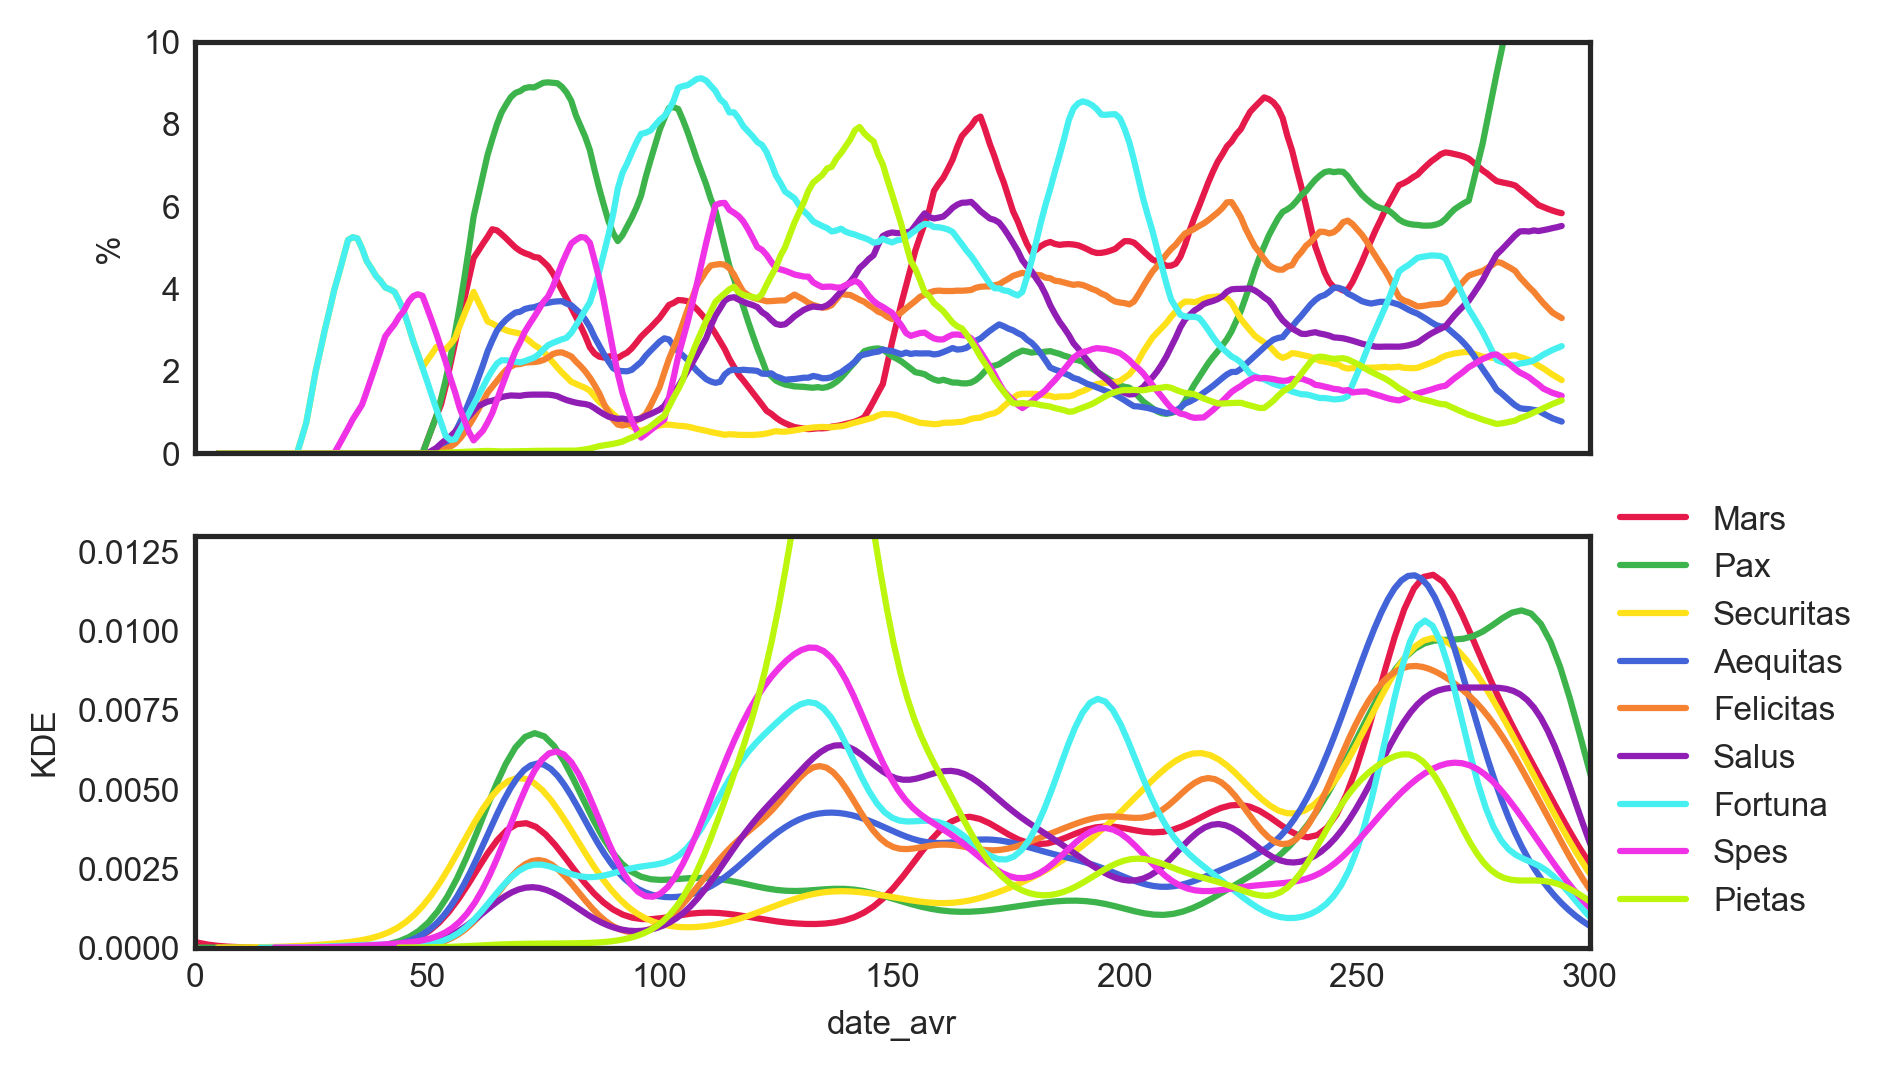

In [84]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(0, 300)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_avr"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(0, 300)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

In [85]:
#task: coins_by_date

# Wars and battles

In [86]:
wars = pd.read_csv("../data/wars-and-battles.csv")
wars["Duration"] = wars["Duration"] + 1
wars

Conflict_name  Start_date  End_date  \
0      Mutiny of legions after death of Augustus        14.0      14.0   
1                      Roman invasion in Britain        43.0      43.0   
2                                 Boudica revolt        61.0      61.0   
3                         Jewish Revolt in Judea        66.0      73.0   
4      Year of the four emeperors (Nero's death)        68.0      69.0   
5                    Trajans's conquest of Dacia       101.0     106.0   
6                   Trajan'S invasion of Parthia       115.0     117.0   
7                                     Bar Kokhba       132.0     135.0   
8                               War with parthia       162.0     166.0   
9                               Marcomannic Wars       170.0     180.0   
10               Civil war after Commodus' death       192.0     195.0   
11        Septimius Severus' invasion of Parthia       197.0     199.0   
12                         Invasion of Caledonia       208.0     210.0   
13                 Battle of Nisibis (Parthians)       217.0     217.0   
14                             Battle of Antioch       218.0     218.0   
15   War between Sassanids and Severus Alexander       231.0     232.0   
16                        Battle at the Harzhorn       235.0     235.0   
17                            Battle of Carthage       238.0     238.0   
18                             Battle of Resaena       243.0     243.0   
19                         Battle of Phillopolis       250.0     250.0   
20                            Battle of Abrittus       251.0     251.0   
21                          Battle of mediolanum       259.0     259.0   
22                              Battle fo Edessa       260.0     260.0   
23                             Battle of Naissus       268.0     268.0   
24                      Battles against Alemanni       271.0     271.0   
25                             Palmyrene battles       272.0     272.0   
26                             Battle of Chalons       274.0     274.0   
27                          Battle of the Margus       285.0     285.0   
28                             Battle of Carrhae       296.0     296.0   
29  Battles agains Alemanni and battle of Satala       298.0     298.0   

    Duration  
0        1.0  
1        1.0  
2        1.0  
3        8.0  
4        2.0  
5        6.0  
6        3.0  
7        4.0  
8        5.0  
9       11.0  
10       4.0  
11       3.0  
12       3.0  
13       1.0  
14       1.0  
15       2.0  
16       1.0  
17       1.0  
18       1.0  
19       1.0  
20       1.0  
21       1.0  
22       1.0  
23       1.0  
24       1.0  
25       1.0  
26       1.0  
27       1.0  
28       1.0  
29       1.0

In [87]:
dict(wars.iloc[1])

{'Conflict_name': 'Roman invasion in Britain',
 'Start_date': 43.0,
 'End_date': 43.0,
 'Duration': 1.0}

In [99]:
assassinated = pd.read_csv("../data/assassinated-emperors.csv")
assassinated.head(20)

Emperor  Assassinated
0             Caligula            41
1                Galba            69
2            Vitellius            69
3             Domitian            96
4             Commodus           192
5             Pertinax           193
6            Caracalla           217
7                 Geta           211
8            Elgalabus           222
9    Severus Alexander           235
10         Maximinus I           238
11            Pupienus           238
12            Balbinus           238
13  Trebonianus Gallus           253
14           Gallienus           268
15            Aurelian           275
16             Florian           276
17              Probus           282

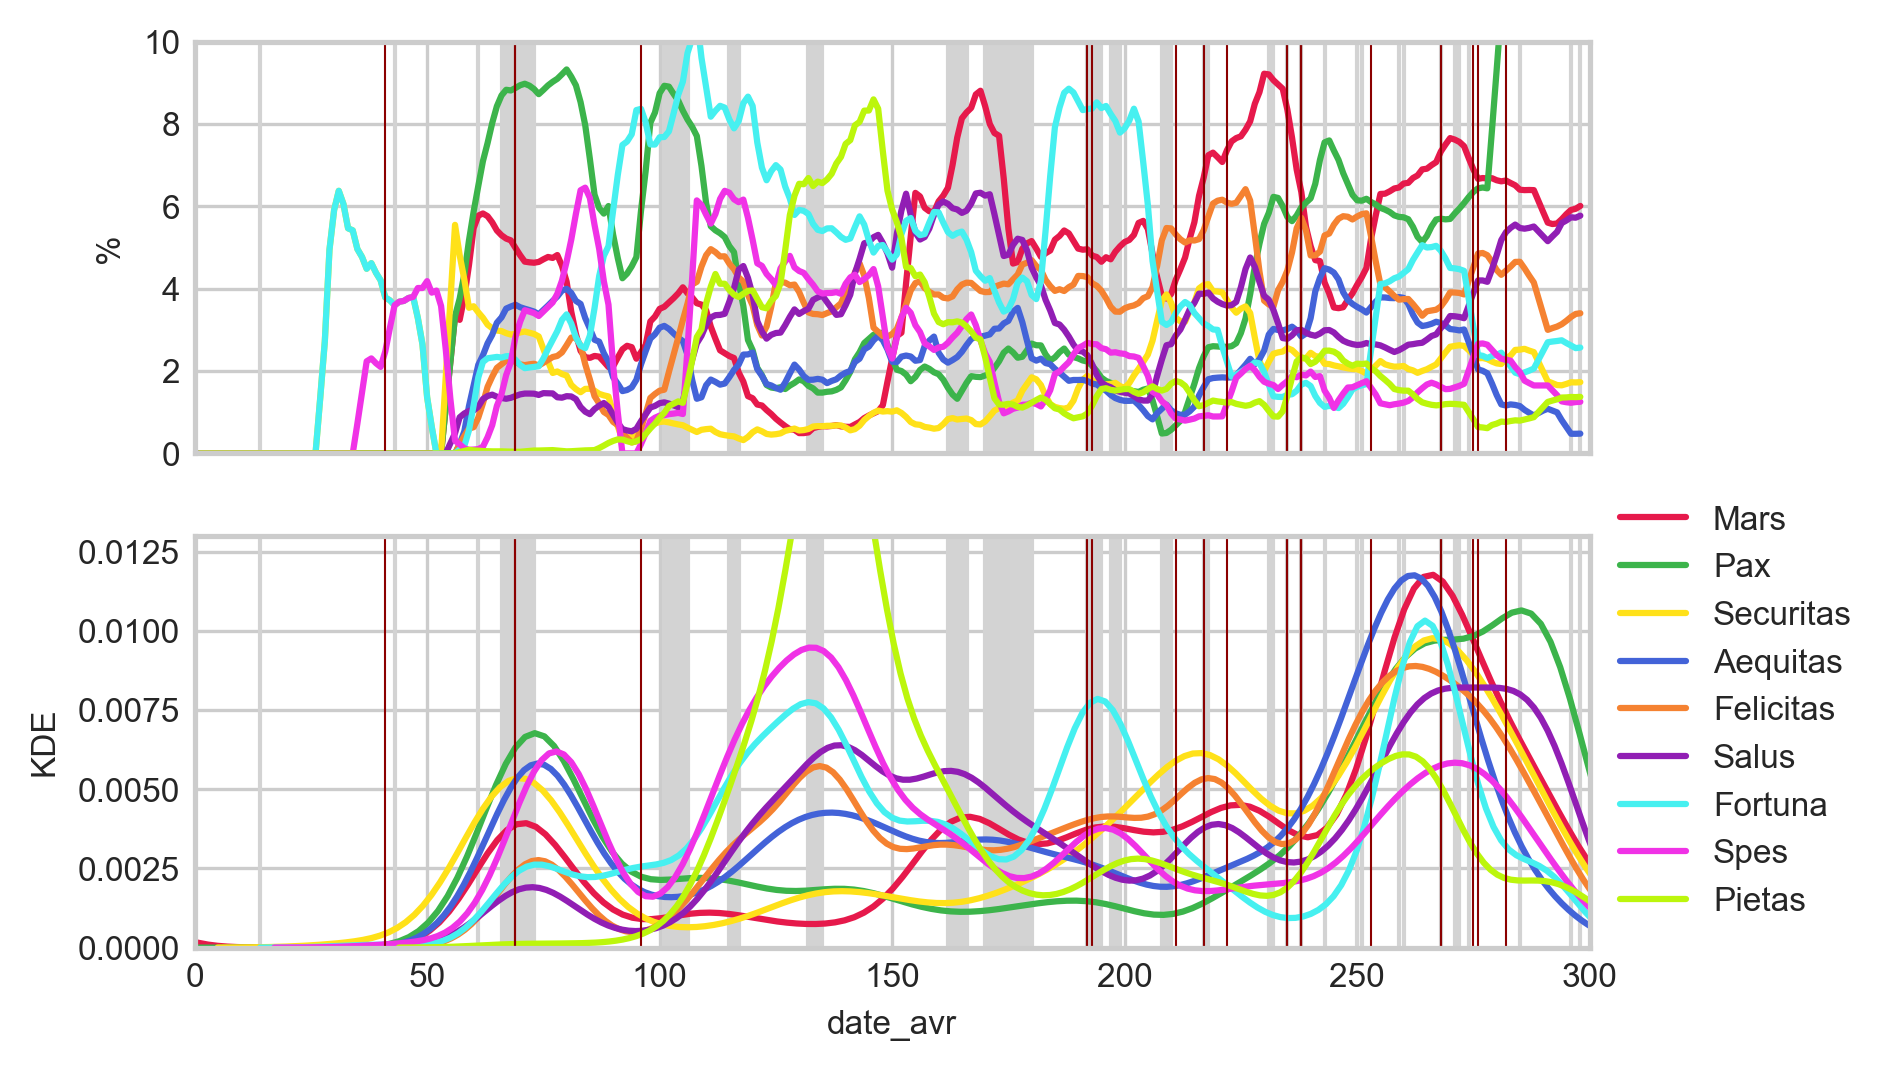

In [95]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df.index, date_freqs_df[deity].rolling(3, center=True).mean(), color=color, label=deity)
ax1.set_xlim(0, 300)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_avr"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(0, 300)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

for n in wars.index:
    war = dict(wars.iloc[n])
    ax1.axvspan(war["Start_date"], war["End_date"], color="lightgrey")
    ax2.axvspan(war["Start_date"], war["End_date"], color="lightgrey")

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax1.axvline(assass["Assassinated"], color="darkred", lw=0.5)
    ax2.axvline(assass["Assassinated"], color="darkred", lw=0.5)


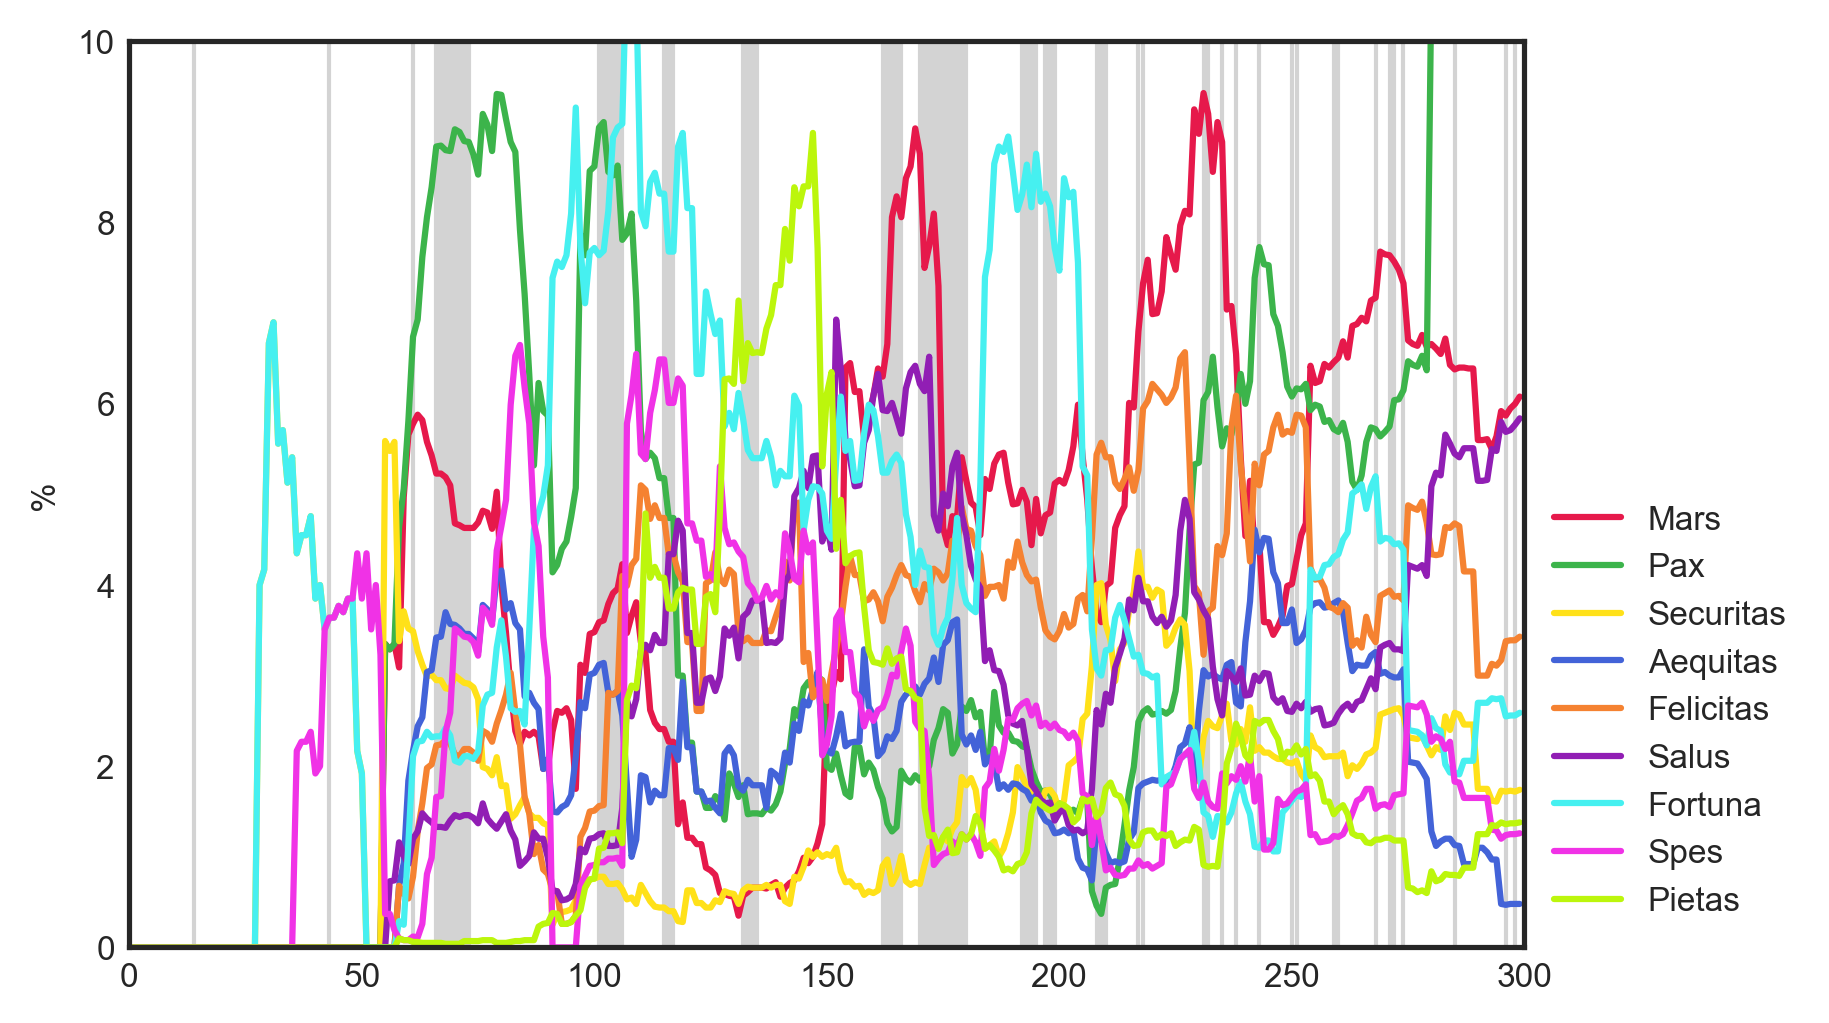

In [47]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax.plot(date_freqs_df.index, date_freqs_df[deity], color=color, label=deity)
    #ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,10)
ax.set_ylabel("%")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="lightgrey")# , alpha=0.5)

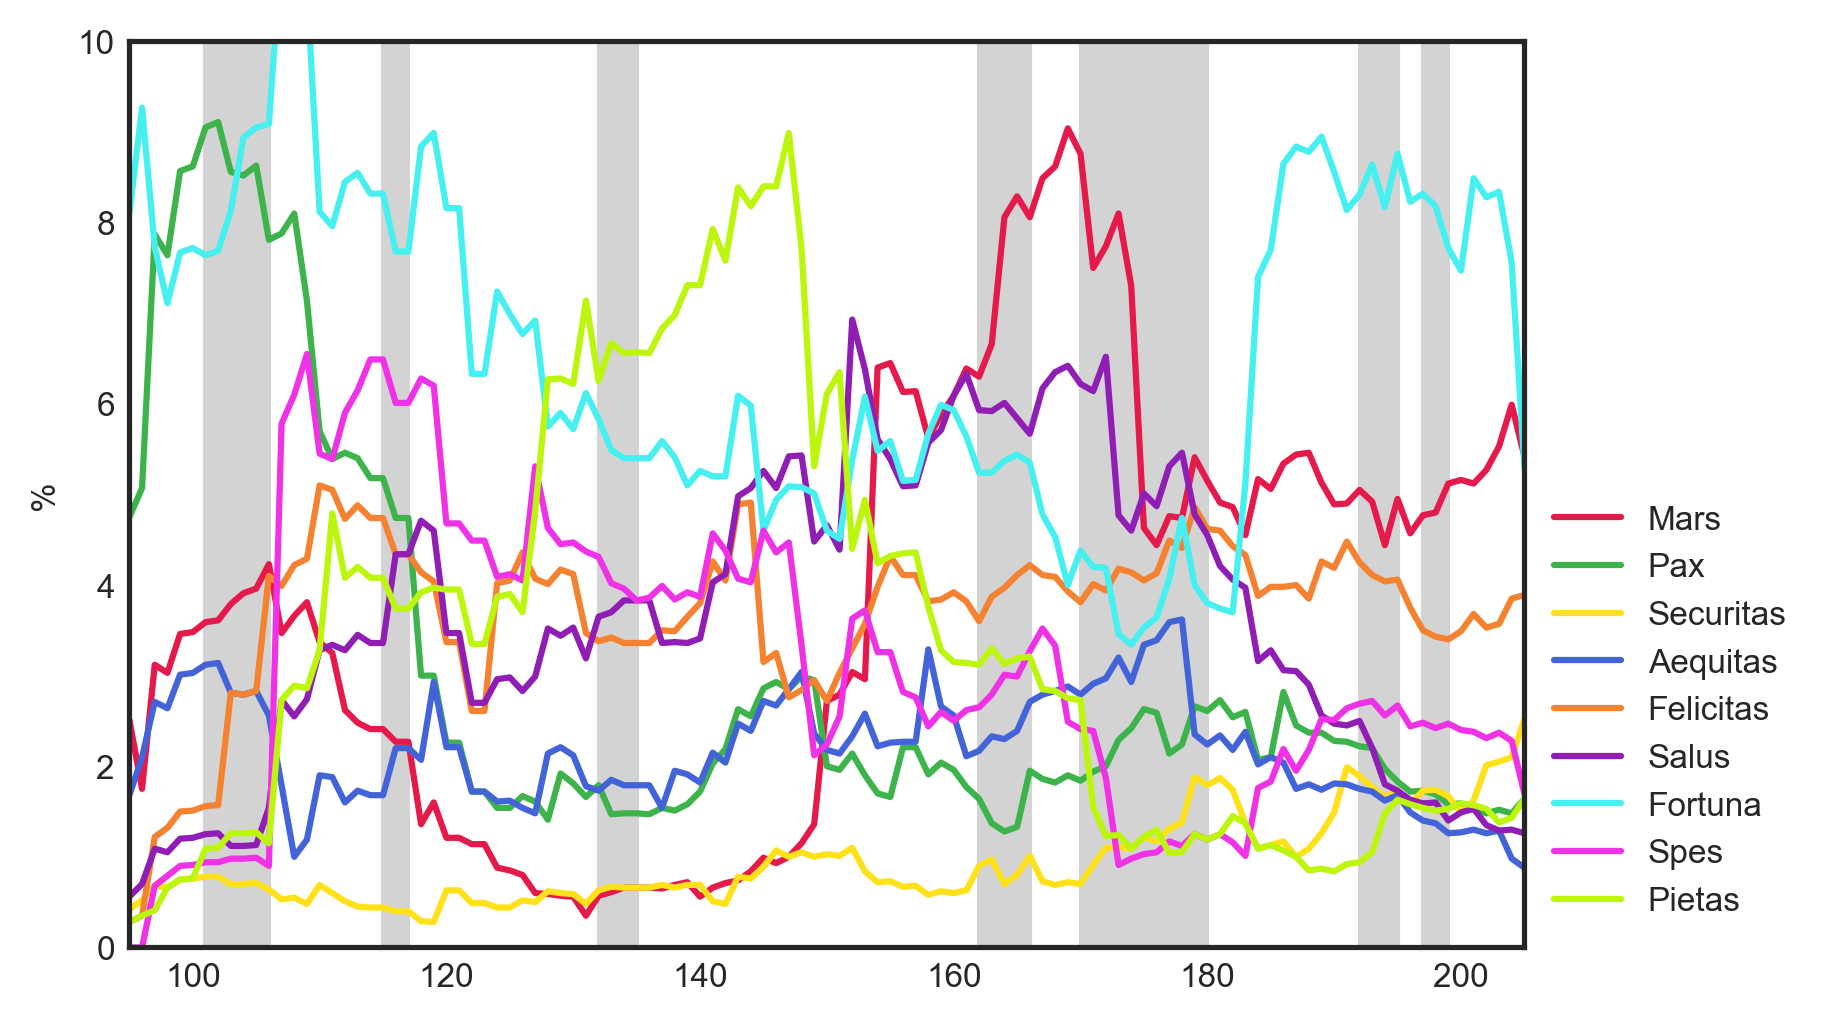

In [48]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax.plot(date_freqs_df.index, date_freqs_df[deity], color=color, label=deity)
    #ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,10)
ax.set_ylabel("%")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

ax.set_xlim(95,205)

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="lightgrey")# , alpha=0.5)

# Exploring inscriptions

In [4]:
# experiments with LIRE
LIRE = gpd.read_file("/Users/kasev//Projects/LIRE_ETL/data/large_data/LIRE_v1-2.geojson", driver="GeoJSON")

In [5]:
LIRE.groupby("type_of_inscription_auto").size().sort_values(ascending=False)

type_of_inscription_auto
epitaph                            74578
votive inscription                 15700
owner/artist inscription           10460
honorific inscription               5573
building/dedicatory inscription     3241
mile-/leaguestone                   2536
identification inscription          1910
acclamation                          443
boundary inscription                 410
military diploma                     329
list                                 294
defixio                              292
letter                               288
label                                273
elogium                              150
public legal inscription             132
seat inscription                      54
private legal inscription             37
prayer                                23
assignation inscription               16
calendar                              13
adnuntiatio                            1
dtype: int64

In [8]:
deities_morphs = {
    "Pax" :     ["Pax", "Pacis", "Paci", "Pacem", "Pace"],
    "Mars":     ["Mars", "Martis", "Marti", "Martem", "Marte"],
    "Securitas":     ["Securitas", "Securitatis", "Securitati", "Securitatem", "Securitate"],
    "Aequitas":     ["Aequitas", "Aequitatis", "Aequitati", "Aequitatem", "Aequitate"],
    "Felicitas":     ["Felicitas", "Felicitatis", "Felicitati", "Felicitatem", "Felicitate"],
    "Salus":     ["Salus", "Salutis", "Saluti", "Salutem", "Salute"],
    "Fortuna":     ["Fortuna", "Fortunae", "Fortunam", "Fortunā"],
    "Spes":     ["Spes", "Spei", "Spem", "Spe"],
    "Pietas":     ["Pietas", "Pietatis", "Pietati", "Pietatem", "Pietate"]
}

In [9]:
# older functional version
def extract_deities(inscription_text):
    deities_found = []
    if not isinstance(inscription_text, str): # if not valid string
        inscription_text = ""
    for deity in deities_morphs.keys():
        for deity_morph in deities_morphs[deity]:
            try:
                if deity_morph in inscription_text: # first check it this way, otherwise skip
                    deity_morph_N = len(re.findall("(\W|^)" + deity_morph + "(\W|$)", inscription_text))
                    if deity_morph_N > 0:
                        deities_found.extend([deity] * deity_morph_N)
                        inscription_text = re.sub("(\W|^)(" + deity_morph + ")(\W|$)", r"\1", inscription_text)
            except: pass
    return deities_found

In [10]:
LIRE["deities"] = LIRE["clean_text_interpretive_word"].apply(extract_deities)

In [11]:
LIRE[LIRE["deities"].apply(bool)]["deities"].tolist()[:3]

[['Mars'], ['Fortuna'], ['Pax']]

In [12]:
LIRE[LIRE["deities"].apply(bool)].sample(100, random_state=0)[["EDCS-ID", "EDH-ID", "not_before", "not_after", "clean_text_interpretive_word", "deities"]].to_csv("../data/lire_deities_sample.csv")

In [13]:
deity = "Fortuna"
len(LIRE[LIRE["deities"].apply(lambda x: deity in x)])

595

In [15]:
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], 1000), axis=1)

In [16]:
LIRE_deities = LIRE[LIRE["deities"].apply(bool)].copy()

[[<matplotlib.patches.Polygon at 0x2e46bbc70>],

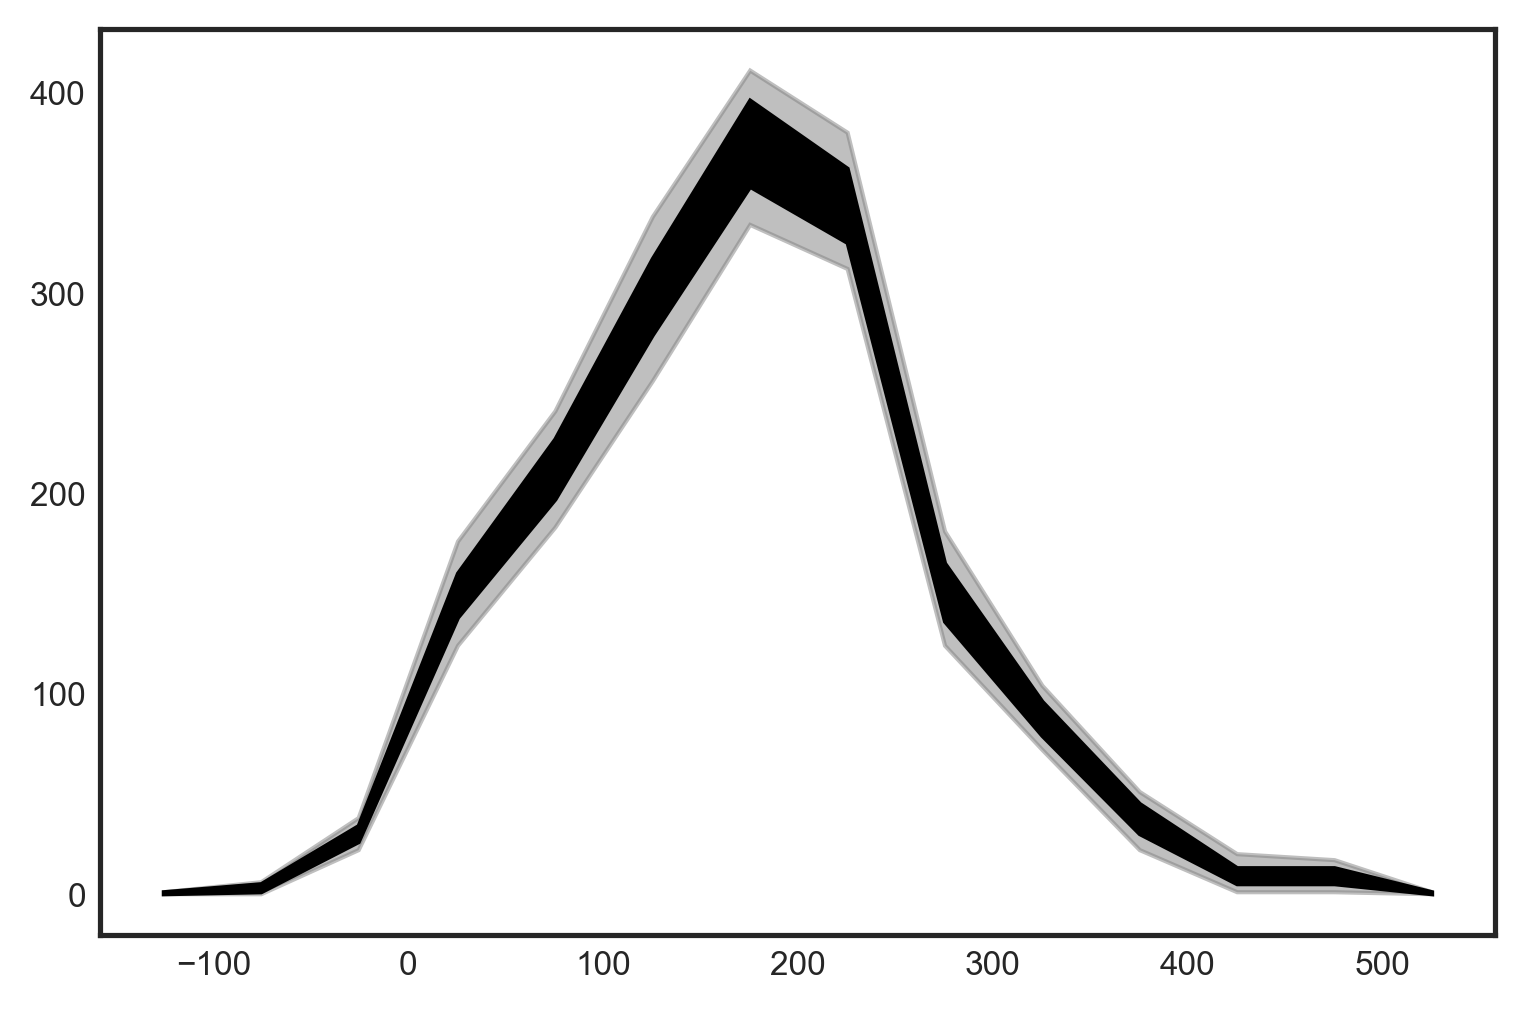

In [17]:
tempun.timeblocksplot_from_randoms(LIRE_deities["random_dates"])

In [27]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

colors_dict = dict(zip(deities_morphs.keys(), colors[:len(deities_morphs.keys())]))
colors_dict

{'Pax': '#e6194b',
 'Mars': '#3cb44b',
 'Securitas': '#ffe119',
 'Aequitas': '#4363d8',
 'Felicitas': '#f58231',
 'Salus': '#911eb4',
 'Fortuna': '#46f0f0',
 'Spes': '#f032e6',
 'Pietas': '#bcf60c'}

In [32]:
import importlib
importlib.reload(tempun)

<module 'tempun' from '/Users/kasev/Projects/coins/coins_venv/lib/python3.10/site-packages/tempun/__init__.py'>

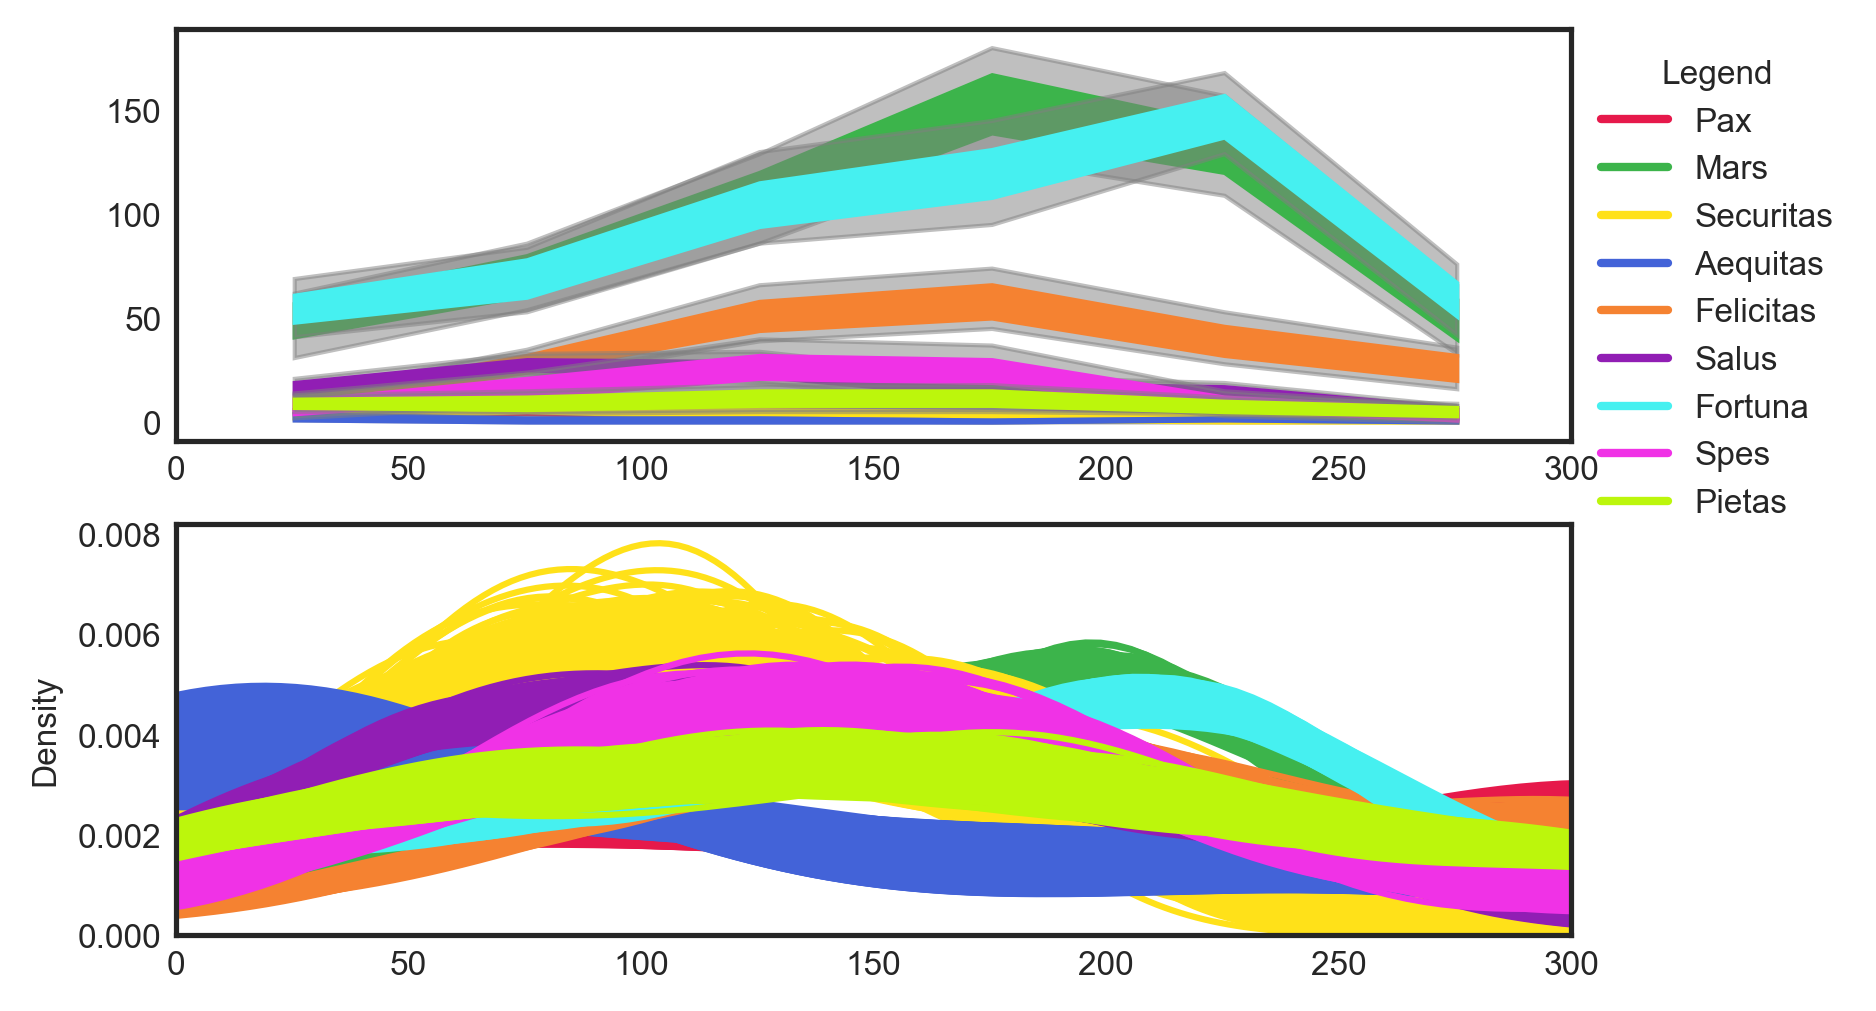

In [35]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in deities_morphs.keys():
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

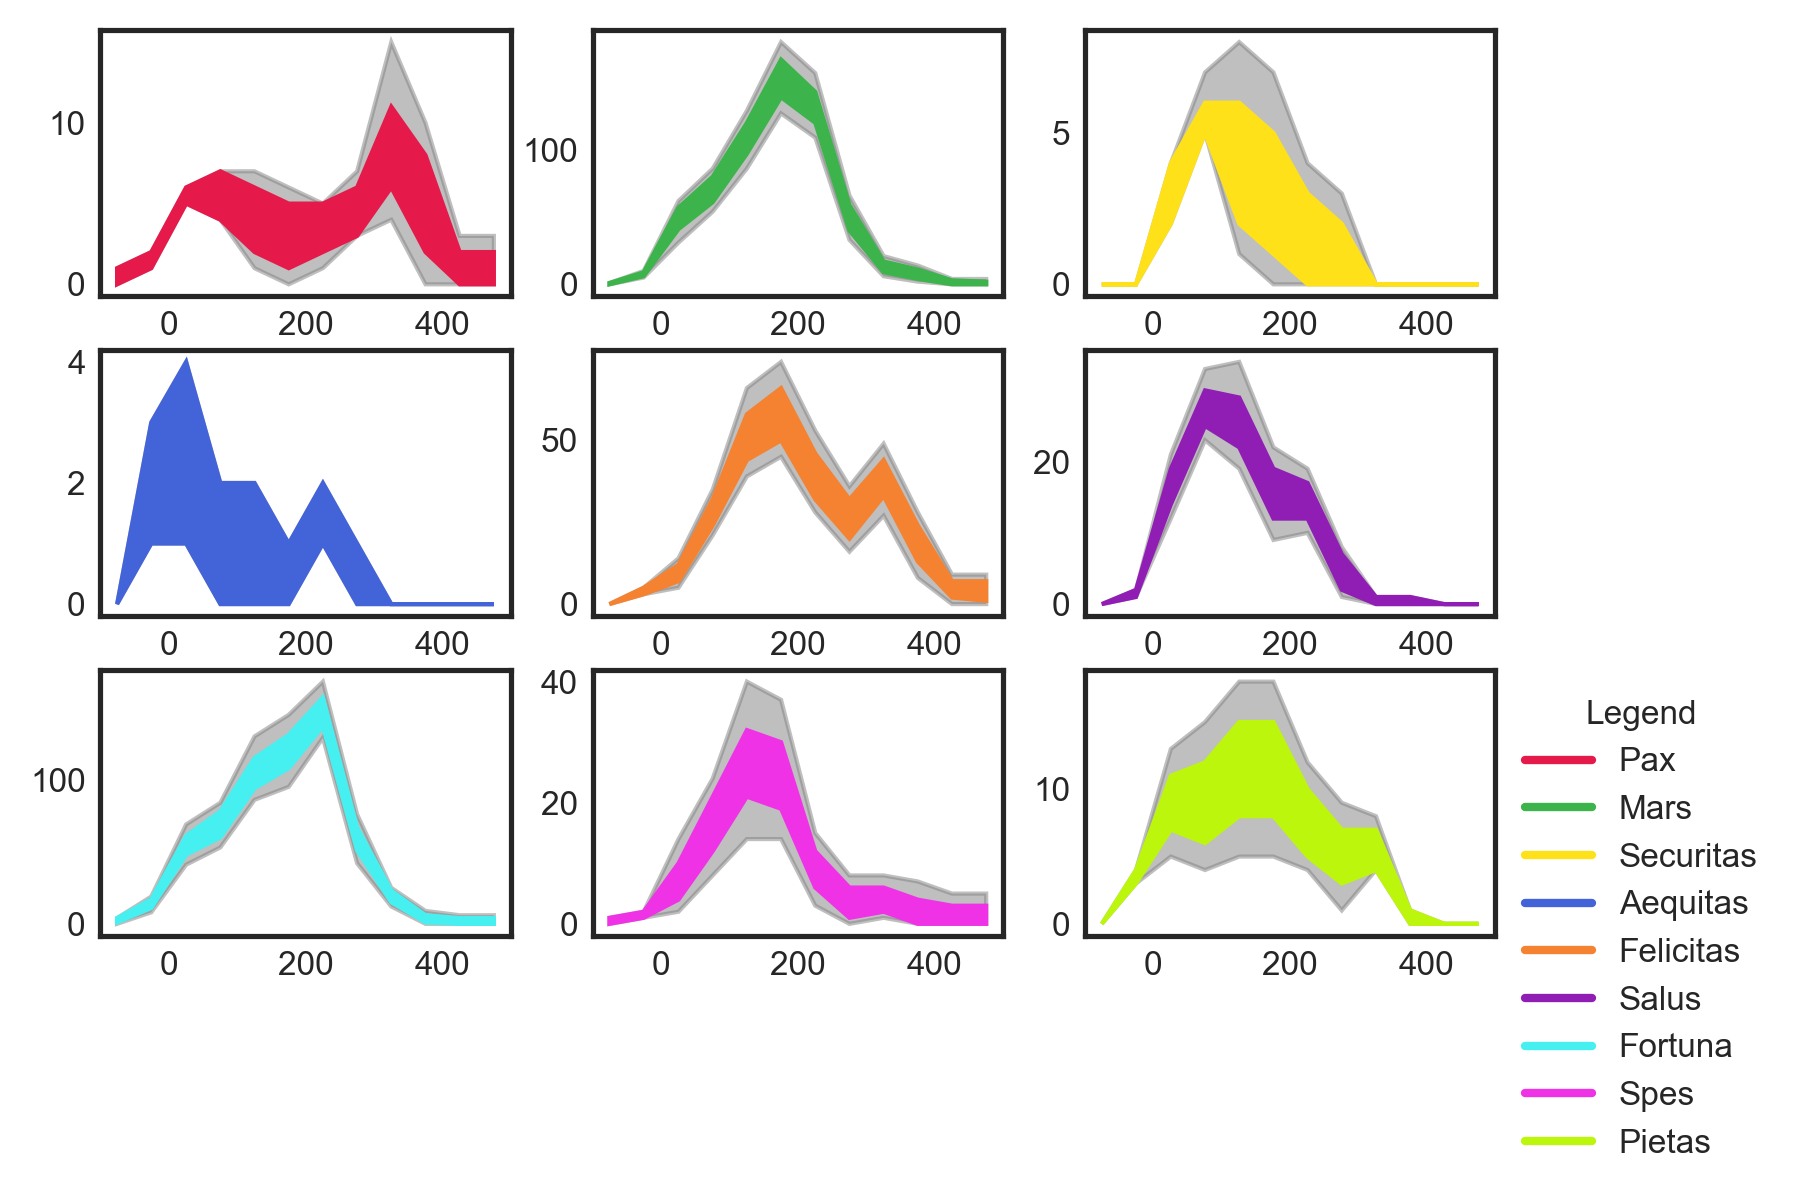

In [39]:
fig, axs = plt.subplots(3,3)

for deity, ax in zip(deities_morphs.keys(), axs.ravel()):
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[-100,500,50], color=colors_dict[deity], ax=ax)
    #tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
    ax.set_xlim(-100,500)
#ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

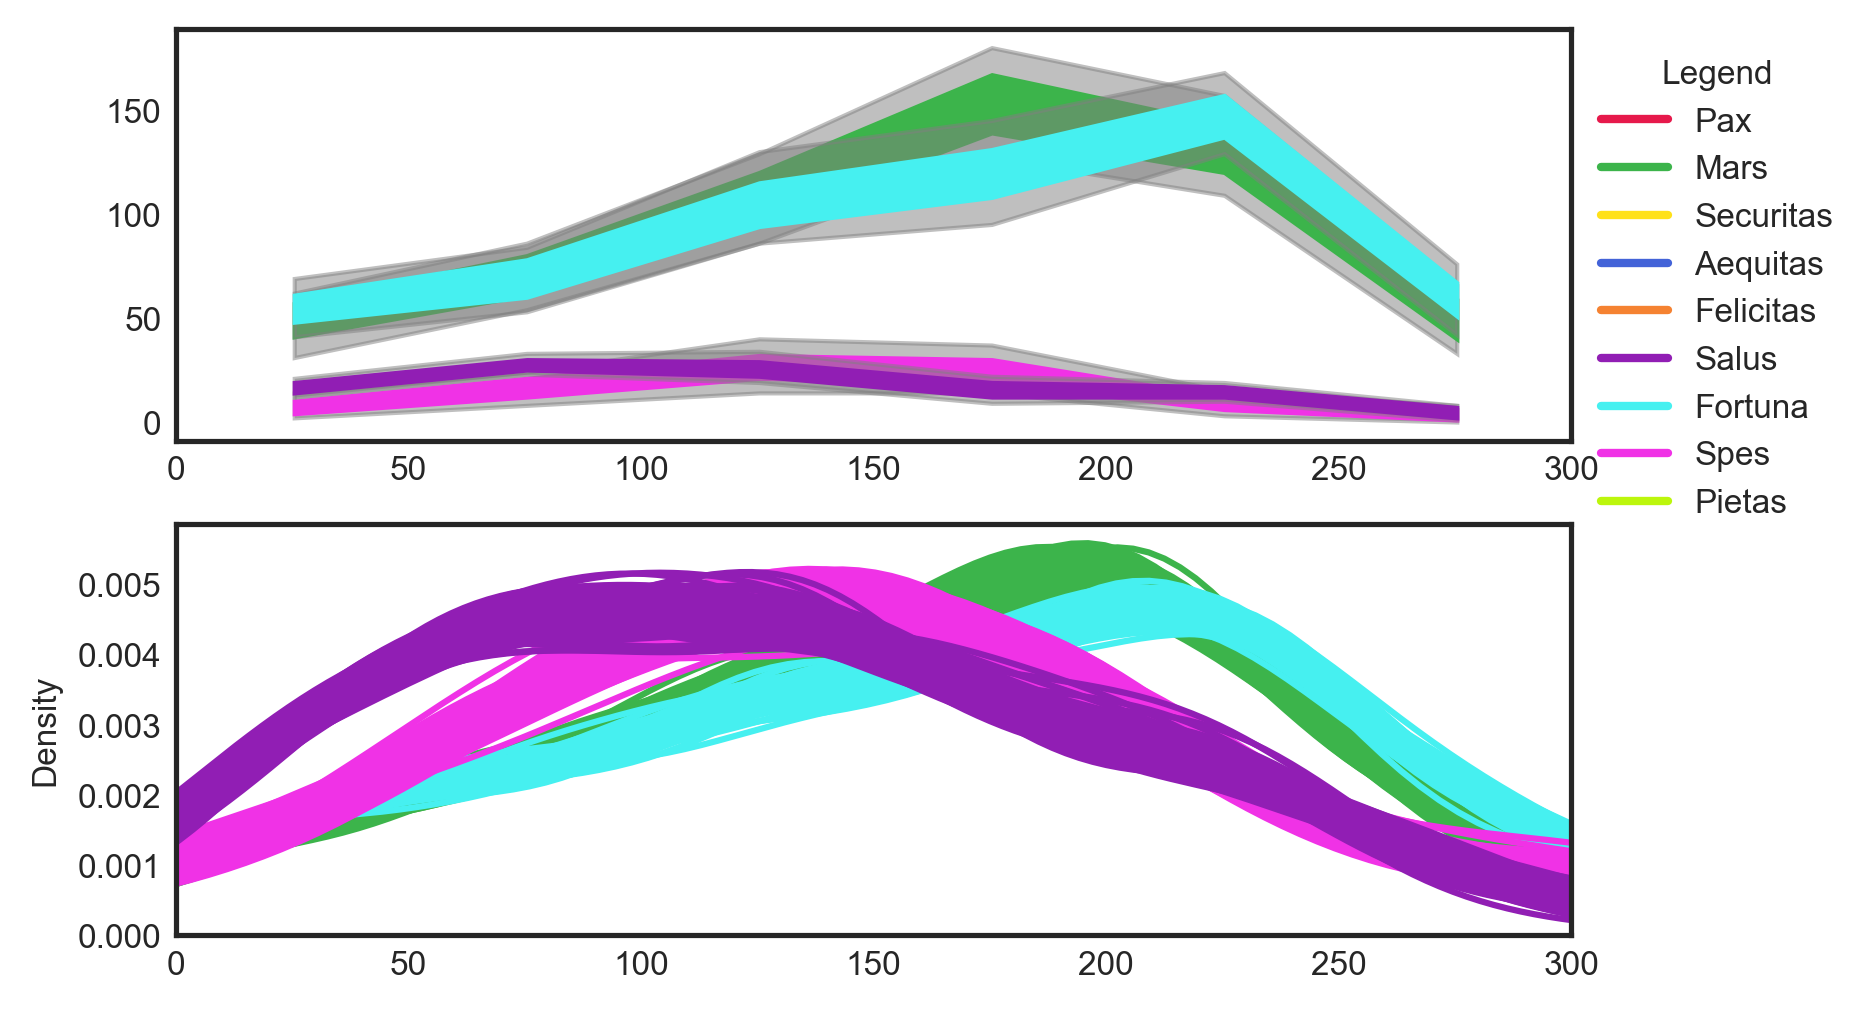

In [41]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in ["Mars", "Fortuna", "Spes", "Salus"]:
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2, random_size=100)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

# Time series analysis
- to correlate two time series data, you have to look at percentual returns, not raw data, otherwise the correlation is typically very high
-
-